# Problem

### 1. Loading data
Loading the generated CSV files for training and test set.<br>
Refer to the file <i>code/preprocessing/Time-series analysis.ipynb</i> to see how they are generated.

In [1]:
import pandas as pd

print('Loading data...')

# Load CSVs as Pandas DFs
training_df = pd.read_csv('./preprocessing/generated_csv/IREN_train.csv',  index_col='date', header=0, sep=';')

test_X_df = pd.read_csv('./preprocessing/generated_csv/IREN_test_X.csv', index_col='date', header=0, sep=';')
test_Y_df = pd.read_csv('./preprocessing/generated_csv/IREN_test_Y.csv', index_col='date', header=0, sep=';')

print('Data loaded successfully\n')

print('Training set: {:d} x {:d}'.format(training_df.shape[0],training_df.shape[1]))
print('Test set: {:d} x {:d}'.format(test_X_df.shape[0],test_X_df.shape[1]))

Loading data...
Data loaded successfully

Training set: 11480 x 26
Test set: 196 x 25


Inspect the training set

In [2]:
pd.set_option('display.max_columns', 500)
training_df.head()

,participant,technology,n_acc_offers,temp_adjusted_mean,renewable_nrg_tot,hydro_tot,ccgt_prod_cost_mean,accepted_mgp_nrg_tot,thermal_nrg_tot,accepted_price_mgp_mean,n_acc_offers_3,n_acc_offers_7,temp_adjusted_mean_3,temp_adjusted_mean_7,renewable_nrg_tot_3,renewable_nrg_tot_7,hydro_tot_3,hydro_tot_7,ccgt_prod_cost_mean_3,ccgt_prod_cost_mean_7,accepted_mgp_nrg_tot_3,accepted_mgp_nrg_tot_7,thermal_nrg_tot_3,thermal_nrg_tot_7,accepted_price_mgp_mean_3,accepted_price_mgp_mean_7
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01,participant_116,ccgt,0,6.705066,193.621283,58.437416,49.3,215.816814,285.971637,45.337500,0.0,0.0,6.495273,7.367634,215.772918,190.158962,76.476855,75.947558,48.900000,47.8,254.913483,254.816386,350.701489,376.099673,45.845854,46.321378
2018-01-02,participant_116,ccgt,0,7.323310,227.393858,82.925698,49.2,270.208227,373.068869,39.955061,0.0,0.0,6.495273,7.367634,215.772918,190.158962,76.476855,75.947558,48.900000,47.8,254.913483,254.816386,350.701489,376.099673,45.845854,46.321378
2018-01-03,participant_116,ccgt,0,5.457443,226.303612,88.067452,48.2,278.715408,393.063962,52.245000,0.0,0.0,6.376232,7.367634,219.738654,190.158962,83.695687,75.947558,48.300000,47.8,272.532964,254.816386,385.890155,376.099673,45.014604,46.321378
2018-01-04,participant_116,ccgt,0,6.347944,205.518491,80.093910,47.5,268.675256,391.537633,42.843750,0.0,0.0,6.385141,7.367634,208.106421,190.158962,85.850760,75.947558,47.633333,47.8,277.547330,254.816386,408.665422,376.099673,48.821528,46.321378
2018-01-05,participant_116,ccgt,0,7.350037,192.497161,89.390917,47.2,285.251325,441.394672,51.375833,0.0,0.0,7.462011,7.977326,180.812083,190.468964,79.551112,81.037431,47.100000,47.7,264.127602,268.326490,406.138143,405.812126,47.205694,46.358759


<mark> **Remark** </mark>

Each couple (`participant`,`technology`) identifies a different time series, with `n_acc_offers` being the target variable.
Values of the time series are provided daily, hence it is said that the lag of the time series is 1 day.

All the columns to the right of `temp_adjusted_mean` (included) are the so called lag features and they have equal values for each time series. The columns `n_acc_offers_3` and `n_acc_offers_7` make an exception since they refer to the mean of the target variable from the previous week, for each time series computed with a rolling window of 3 and 7 days, respectively.

The following table shows exactly the output we want to predict for each time series of the given 28 pairs (`participant`,`technology`) in the assigned week *22-28 February 2019.*

In [2]:
target_example_df = pd.read_pickle('./preprocessing/shared_data/target/target_number_of_plants.pkl')
target_example_df.tail(7)

number_of_plant                                                 \
participant participant_116                                participant_120   
technology             ccgt ccgt400 ccgt800 pump reservoir         ccgt800   
date                                                                         
20190222                  0       1       1    1         2               1   
20190223                  0       1       0    1         2               1   
20190224                  0       1       0    1         2               1   
20190225                  0       2       0    1         2               1   
20190226                  0       2       0    1         2               1   
20190227                  0       2       1    1         2               1   
20190228                  0       2       1    1         2               1   

                                                               ...  \
participant participant_146           participant_158          ...   
technology             pump reservoir         ccgt400 ccgt800  ...   
date                                                           ...   
20190222                  1         0               3       1  ...   
20190223                  1         0               3       1  ...   
20190224                  1         0               3       1  ...   
20190225                  2         0               3       1  ...   
20190226                  1         0               3       1  ...   
20190227                  1         0               3       0  ...   
20190228                  2         0               3       1  ...   

                                                                  \
participant participant_87 participant_89                          
technology         ccgt400        ccgt400 ccgt800 coal reservoir   
date                                                               
20190222                 5              0       2    2         3   
20190223                 6              0       0    2         3   
20190224                 6              0       0    2         3   
20190225                 5              0       2    2         3   
20190226                 5              1       2    2         3   
20190227                 5              1       2    2         3   
20190228                 5              0       2    2         3   

                                                        
participant participant_96                              
technology         ccgt400 ccgt800 coal pump reservoir  
date                                                    
20190222                 2       0    3    0         1  
20190223                 1       0    3    0         2  
20190224                 2       0    3    0         1  
20190225                 2       0    3    1         2  
20190226                 2       0    3    2         2  
20190227                 2       0    3    3         3  
20190228                 2       0    4    1         3  

[7 rows x 28 columns]

The given pairs (`participant`,`technology`) are:

In [3]:
unique_pairs = training_df.groupby(['participant','technology']) \
    .size().reset_index().drop(columns={0}).values

print('Here are the given {} pairs\n'.format(len(unique_pairs)))
print(unique_pairs)

Here are the given 28 pairs

[['participant_116' 'ccgt']
 ['participant_116' 'ccgt400']
 ['participant_116' 'ccgt800']
 ['participant_116' 'pump']
 ['participant_116' 'reservoir']
 ['participant_120' 'ccgt800']
 ['participant_146' 'pump']
 ['participant_146' 'reservoir']
 ['participant_158' 'ccgt400']
 ['participant_158' 'ccgt800']
 ['participant_158' 'pump']
 ['participant_158' 'reservoir']
 ['participant_176' 'ccgt800']
 ['participant_21' 'reservoir']
 ['participant_60' 'ccgt400']
 ['participant_75' 'ccgt400']
 ['participant_75' 'ccgt800']
 ['participant_87' 'ccgt']
 ['participant_87' 'ccgt400']
 ['participant_89' 'ccgt400']
 ['participant_89' 'ccgt800']
 ['participant_89' 'coal']
 ['participant_89' 'reservoir']
 ['participant_96' 'ccgt400']
 ['participant_96' 'ccgt800']
 ['participant_96' 'coal']
 ['participant_96' 'pump']
 ['participant_96' 'reservoir']]


### 2. Using Machine Learning custom models

The problem is approached with a "*Divide and Conquer*" strategy: a regression model is trained for each given participant of the market instead of predicting each individual time series. Here we show the list of participants.

In [4]:
# Unique participants
u_participants = training_df.participant.unique()

print("Total regression model to be trained: {}".format(len(u_participants)))
print(u_participants)

Total regression model to be trained: 11
['participant_116' 'participant_120' 'participant_146' 'participant_158'
 'participant_176' 'participant_21' 'participant_60' 'participant_75'
 'participant_87' 'participant_89' 'participant_96']


As a consequence, the column `technology` is the only feature to be encoded into int.

In [5]:
from sklearn.preprocessing import LabelEncoder

# Unique technologies
u_technologies = training_df.technology.unique()

# Create an automatic encoding
le = LabelEncoder()

# N.B. LabelEncorder.fit() is a singleton!
enc_technologies = le.fit(u_technologies)

# Create a dictionary to show the mapping executed
le_mapping_technologies = dict(zip(enc_technologies.classes_,
        enc_technologies.transform(le.classes_)))

# Encode training and test set
training_df.technology = enc_technologies.transform(training_df.technology)

test_X_df.technology = enc_technologies.transform(test_X_df.technology)
test_Y_df.technology = enc_technologies.transform(test_Y_df.technology)

print('The encoding is the following:')

le_mapping_technologies

The encoding is the following:


{'ccgt': 0, 'ccgt400': 1, 'ccgt800': 2, 'coal': 3, 'pump': 4, 'reservoir': 5}

According to the "Divide and conquer" strategy, each regression model corresponding to a participant is cross-validated using the 5-Fold Cross Validation strategy. At the end, each participant will have a list of 5 its own regression models tuned with the best parameters. The output for each time series (`participant`,`technology`) is predicted as the mean of the 5 regression models corresponding to the participant.

Both of the algorithms implemented share a common helper class to keep track of the best models (and their metadata) during 5-Fold Cross Validation, presented here. In the next sections each algorithm is presented and tuned separately with different functions. Final results and comparisons with the solution obtained during the C1A0 Hackathon are provided and furtherly commentend in the section 5-6 of the report. 

In [6]:
class CVInfo():
    """
    Helper class to keep track of the best models
    and metadata after 5-Fold CV via a
    Divide and conquer strategy
    
    Attributes
    ------------
    score: float
    RMSE obtained by 5 regression models
    
    models: list
    List of 5 regression model (class GBDT or
    RandomForestRegressor) trained during a 
    5-Fold Cross validation
    
    params: dict
    Set of parameters used in the models to
    obtain the score
    
    """
    
    def __init__(self): 
        self.score  = None
        self.models = []
        self.params = {}
        
    def check_score(self, score, models=[], params={}):
        """
        Update the attributes according to the score

        Parameters
        ------------
        score: float
        Score to compare with the models included
        in this object

        models: list
        List of 5 regression model (class GBDT or
        RandomForestRegressor) trained during a 
        5-Fold Cross validation

        params: dict
        Set of parameters used in the models to
        obtain the score

        """
        if self.score is None or score > self.score:
            self.score  = score
            self.models = models
            self.params = params
            
            return True
        else:
            return False

#### Random Forest (by Gianvito Losapio)

The implementation of Random Forest is included in the folder <i>randforest/src</i>:

- <i>decision_tree.py</i> contains the classes:
    - `Tree` which models a regression tree
    - `Node` which models a single node of the tree and contains the function `build` used to grow the regression tree according to the greedy solution described in the section 3 of the report
    
    
- <i>rf.py</i> contains the class `RandomForestRegressor` used to create the random forest model


- <i>utils.py</i> contains the function used to compute the Mean Square Error (MSE) whenever needed.

In [14]:
import numpy as np
import pandas as pd
import sys

# Generate random fold indexes
from sklearn.model_selection import KFold

# Custom imports
from randforest.src.rf import RandomForestRegressor
from randforest.src.utils import calculate_MSE

For the sake of simplicity the 5-Fold Cross Validation is executed with only 6 different combination of parameters:
- `n_estimators`: the number of the trees in the forest
- `max_depth`: the maximum depth of the single trees
- `max_features`: the number of random features to consider when looking for the best split

The elapsed time is: 1h:21m:44s (Intel Core i7-8750H @ 2.20 GHz, 8 GB RAM)

In [16]:
# Comment the following lines if you want to execute CV again
import pickle

with open('best_CV_info_RF.pickle','rb') as f:
     best_CV_info = pickle.load(f)

In [37]:
from sklearn.model_selection import KFold

def launch_IREN_VFoldCV(training_df, params_combinats,
                            participants, seed=None, num_folds=5,
                            out_features=['n_acc_offers', 'participant']):
    """
    Function to execute V-Fold CV tuned for IREN case study
    
    Parameters
    ------------
    training_df: Pandas dataframe
    Training set
    
    params_combinats: list of dictionaries
    List of parameters combinations to be cross-validated
    
    participants: list
    List of participants given by IREN
    
    seed: int [default=None]
    If None non-repeatable fold split is executed
    
    num_folds: int [default=5]
    Number of folds for V-Fold CV
    
    out_features: list
    Columns to be dropped in the validation fold
    for the prediction
    
    """
    
    from datetime import datetime
    CV_start_time = datetime.now()
    
    # Output CV info per participant. At the end of VFoldCV
    # best_CV_info[participant] will contain a CV info object
    # for each participant saving the model, the set of best parameters,
    # the score
    best_CV_info = {}

    # Init CV_info dict
    for participant in participants:
        best_CV_info[participant] = CVInfo()
        
    for params in params_combinats:
        print('Testing CV with params:', params)
        current_RF_models = {}

        for participant in participants:
            print("{}-Fold CV for participant:".format(num_folds), participant)

            KF_generator = KFold(n_splits=num_folds, random_state=seed)
            current_RF_models[participant] = []

            # Divide and conquer strategy: train a model for a single participant
            # Separate current XY sets
            X_train_Participant = training_df.loc[training_df.participant
                                        == participant].reset_index(drop=True)

            Y_train_Participant = X_train_Participant.n_acc_offers

            # Drop useless columns
            X_train_Participant.drop(columns=out_features, inplace=True)

            CV_score = 0

            # Fit the CART learners on the current fold
            for fold_idx, (train_idx, valid_idx) in enumerate(
                                KF_generator.split(X_train_Participant, Y_train_Participant)):

                X_train, X_valid = X_train_Participant.loc[train_idx].to_numpy(), \
                        X_train_Participant.loc[valid_idx].to_numpy()

                Y_train, Y_valid = Y_train_Participant.iloc[train_idx].to_numpy(), \
                        Y_train_Participant.iloc[valid_idx].to_numpy()

                
                # Create a RF model
                model_RF = RandomForestRegressor()

                # Train
                model_RF.train(X_train, Y_train, X_valid, Y_valid, params)

                current_RF_models[participant].append(model_RF)
                    
                Y_pred_valid = model_RF.predict(X_valid)

                valid_RMSE = np.sqrt(calculate_MSE(Y_valid, Y_pred_valid))
                
                print("Participant: {}, at fold_idx {} with RMSE: {}\n" \
                             .format(participant, fold_idx, valid_RMSE))

                CV_score += valid_RMSE / num_folds

            # Update the best
            if best_CV_info[participant].check_score(CV_score,
                        current_RF_models[participant], params):
                print('Participant: {}, got a new best CV score: {} with params: {}\n' \
                                  .format(participant, CV_score, params))
    
    print('CV finished. Elapsed time: {}' \
                .format(datetime.now() - CV_start_time))
            
    return best_CV_info

In [38]:
# Set of parameters chosen for 5-Fold Cross Validation

# Max features as square root of the number of features
num_features = training_df.shape[1] - 2
max_features = int(np.sqrt(num_features))

# Custom building options
params = [
    {
    'n_estimators': 10,
    'max_depth': 3,
    },
    {
    'n_estimators': 10,
    'max_depth': 5,       
    },
    {
    'n_estimators': 5,
    'max_depth': 7,
    'max_features': max_features               
    },
    {
    'n_estimators': 5,
    'max_depth': 7,      
    },
    {
    'n_estimators': 5,
    'max_depth': 10,
    'max_features': max_features        
        
    },
    {
    'n_estimators': 5,
    'max_depth': 13,
    'max_features': max_features       
        
    }
]

Testing CV with params: {'n_estimators': 10, 'max_depth': 3}
5-Fold CV for participant: participant_116
Model parameters:
{'min_split_gain': 0.0, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10, 'max_features': None}
Training started...
Tree number   1, Training L2 error: 0.0743902439, Validation L2 error: 2.0024390244, Elapsed time: 0:00:04.486805
Tree number   2, Training L2 error: 0.0713414634, Validation L2 error: 2.3390243902, Elapsed time: 0:00:04.489759
Tree number   3, Training L2 error: 0.0603658537, Validation L2 error: 2.3000000000, Elapsed time: 0:00:04.512898
Tree number   4, Training L2 error: 0.0774390244, Validation L2 error: 2.5902439024, Elapsed time: 0:00:04.402202
Tree number   5, Training L2 error: 0.0768292683, Validation L2 error: 2.0609756098, Elapsed time: 0:00:04.329844
Tree number   6, Training L2 error: 0.0774390244, Validation L2 error: 3.4048780488, Elapsed time: 0:00:04.805047
Tree number   7, Training L2 error: 0.0756097

In [ ]:
# Uncomment to launch Cross validation

# best_CV_info = launch_IREN_VFoldCV(training_df, params,
#                         u_participants, num_folds=5)

The list of the best parameters for each regression model is shown together with the corresponding RMSE.

In [18]:
global_rmse = 0
for participant, CV_info in best_CV_info.items():
    global_rmse += CV_info.score
    print (participant, CV_info.params, CV_info.score)
    
print('Global RMSE: {:3f}'.format(global_rmse/len(best_CV_info.items())))

participant_116 {'n_estimators': 5, 'max_depth': 7} 0.6929994727698511
participant_120 {'n_estimators': 5, 'max_depth': 7} 0.5167813089032119
participant_146 {'n_estimators': 5, 'max_depth': 13, 'max_features': 4} 0.7412603526365011
participant_158 {'n_estimators': 5, 'max_depth': 13, 'max_features': 4} 0.6842460464581757
participant_176 {'n_estimators': 5, 'max_depth': 7} 0.5447924411163483
participant_21 {'n_estimators': 5, 'max_depth': 7} 0.40557378944566064
participant_60 {'n_estimators': 5, 'max_depth': 7} 0.44825118284436005
participant_75 {'n_estimators': 5, 'max_depth': 7, 'max_features': 4} 0.8177611977540428
participant_87 {'n_estimators': 5, 'max_depth': 13, 'max_features': 4} 1.3391152398773922
participant_89 {'n_estimators': 5, 'max_depth': 10, 'max_features': 4} 0.8655632195053073
participant_96 {'n_estimators': 5, 'max_depth': 10, 'max_features': 4} 1.457784792855071
Global RMSE: 0.774012


In [47]:
# Save the file
import pickle

with open('best_CV_info.pickle', 'wb') as f:
    pickle.dump(best_CV_info, f)

Using the best models for each participant, the prediction for the test set is computed.

In [101]:
import gc

# Load test set
test_X_df = pd.read_csv('./preprocessing/generated_csv/IREN_test_X.csv', index_col='date', header=0, sep=';')
test_Y_df = pd.read_csv('./preprocessing/generated_csv/IREN_test_Y.csv', index_col='date', header=0, sep=';')

# Encode technology according to the already used encoding scheme
test_X_df.technology = enc_technologies.transform(test_X_df.technology)

# Columns to be dropped from the input of test set
out_features=['date', 'participant']

# Number of folds used in V-Fold CV
num_folds = 5

# Init of the array containing the predictions
test_Y_pred = []

# for each regression model (for each participant)
for participant in best_CV_info.keys():
    print("Extracting {}'s data...".format(participant.capitalize()))

    # Extract the current participant
    X_test_Participant = test_X_df.loc[test_X_df.participant
                                == participant].reset_index()
    
    # Collect dates in X
    X_test_Participant_date = X_test_Participant.date

    # Drop the specified columns from the test set input
    X_test_Participant.drop(columns=out_features, inplace=True)
    
    # Init array of prediction for the current participant
    Y_pred_test_Participant = np.zeros(X_test_Participant.shape[0])
    
    test_single_Y_df = None
    
    # for each model of the current participant
    for fold_idx in range(num_folds):
        
        # extract the current model
        model_RF = best_CV_info[participant].models[fold_idx]
        
        # Accumulate predictions
        Y_pred_test_Participant += model_RF.predict(X_test_Participant.to_numpy())
        
        gc.collect()
        
    # Get a mean of the prediction of the models, cast to the nearest integer                   
    Y_pred_test_Participant = (np.round(Y_pred_test_Participant / num_folds)).astype(int)
    
    # Build a dataframe containing the predictions for a single participant
    test_single_Y_df = pd.DataFrame({'technology': enc_technologies.inverse_transform(
                                            X_test_Participant.technology),
                            'date': X_test_Participant_date, 'participant': participant,
                            'n_acc_offers': Y_pred_test_Participant})
    
    # Append the dataframe
    test_Y_pred.append(test_single_Y_df)
    
    print("{} scoring is completed\n".format(participant.capitalize()))
    gc.collect()

# Create the final dataframe
test_Y_pred_df = pd.concat(test_Y_pred)

Extracting Participant_116's data...
Participant_116 scoring is completed

Extracting Participant_120's data...
Participant_120 scoring is completed

Extracting Participant_146's data...
Participant_146 scoring is completed

Extracting Participant_158's data...
Participant_158 scoring is completed

Extracting Participant_176's data...
Participant_176 scoring is completed

Extracting Participant_21's data...
Participant_21 scoring is completed

Extracting Participant_60's data...
Participant_60 scoring is completed

Extracting Participant_75's data...
Participant_75 scoring is completed

Extracting Participant_87's data...
Participant_87 scoring is completed

Extracting Participant_89's data...
Participant_89 scoring is completed

Extracting Participant_96's data...
Participant_96 scoring is completed



A global performance is computed.

In [102]:
print('Test RMSE error with RF: {}'.format(np.sqrt(calculate_MSE(
            test_Y_df.n_acc_offers.to_numpy(), test_Y_pred_df.n_acc_offers.to_numpy()))))

Test RMSE error with RF: 0.6018678409411685


The RMSE for each (`participant`,`technology`) is computed and shown. The plots of all the forecasted time series is provided vs the ground truth.

participant_116 ccgt 0.0
participant_116 ccgt400 0.6546536707079771
participant_116 ccgt800 0.7559289460184544
participant_116 pump 0.0
participant_116 reservoir 0.0
participant_120 ccgt800 0.0
participant_146 pump 0.5345224838248488
participant_146 reservoir 0.9258200997725514
participant_158 ccgt400 0.0
participant_158 ccgt800 0.7559289460184544
participant_158 pump 0.5345224838248488
participant_158 reservoir 0.0
participant_176 ccgt800 0.0
participant_21 reservoir 0.0
participant_60 ccgt400 0.0
participant_75 ccgt400 0.9258200997725514
participant_75 ccgt800 0.8451542547285166
participant_87 ccgt 0.3779644730092272
participant_87 ccgt400 0.0
participant_89 ccgt400 1.1338934190276817
participant_89 ccgt800 0.3779644730092272
participant_89 coal 0.0
participant_89 reservoir 0.0
participant_96 ccgt400 0.3779644730092272
participant_96 ccgt800 0.9258200997725514
participant_96 coal 0.6546536707079771
participant_96 pump 0.9258200997725514
participant_96 reservoir 1.3093073414159542


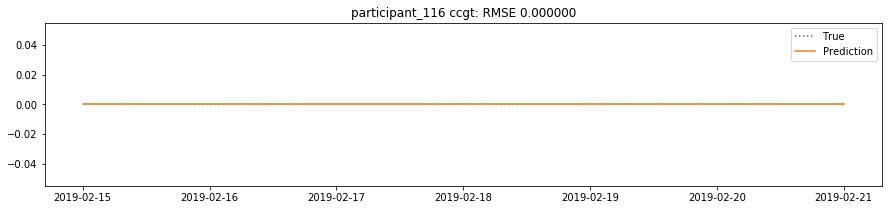

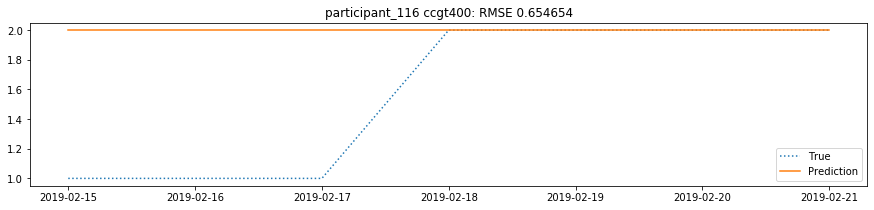

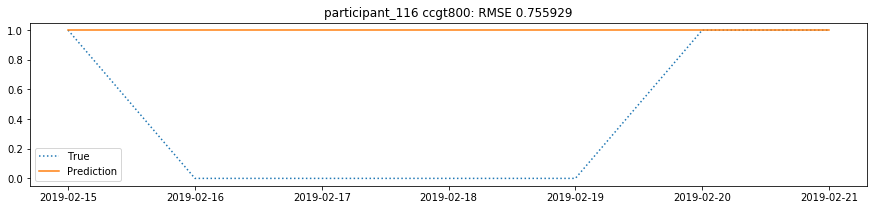

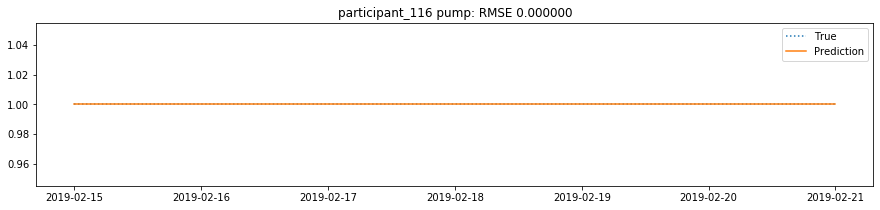

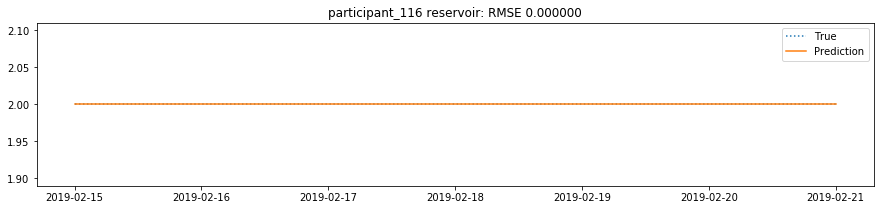

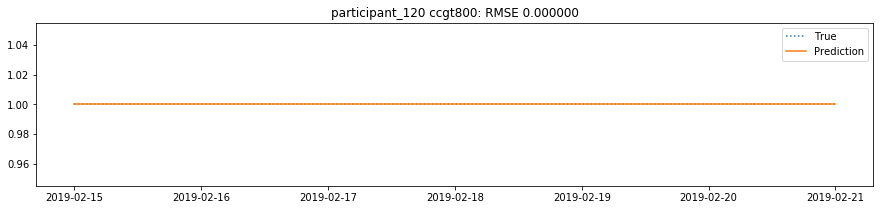

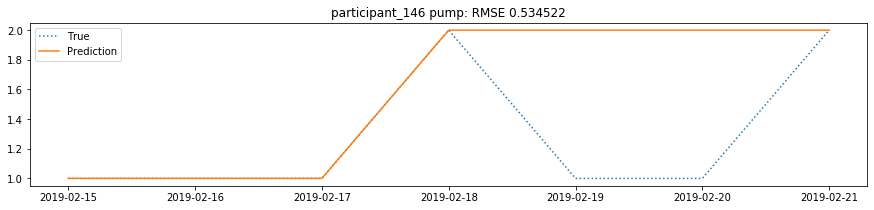

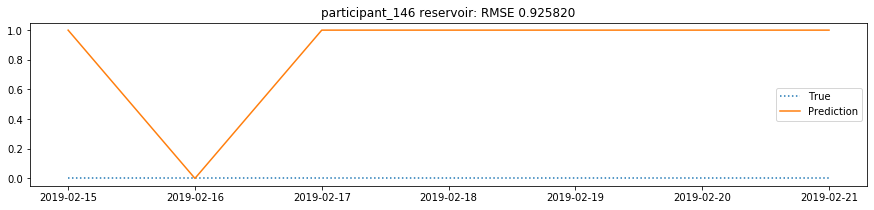

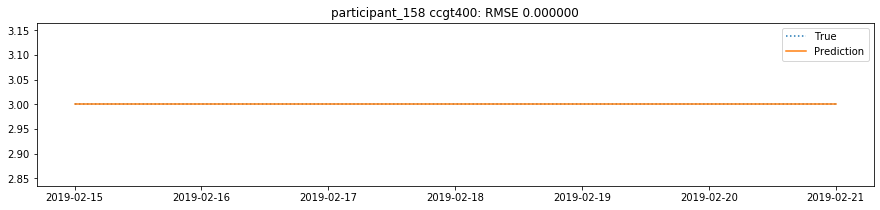

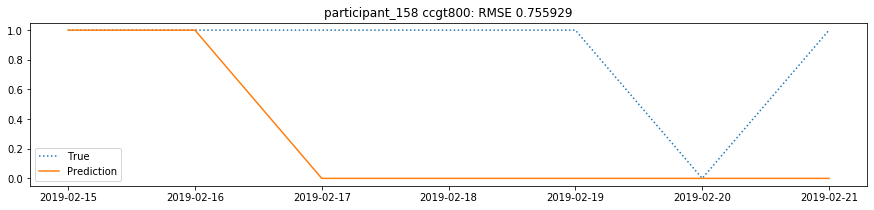

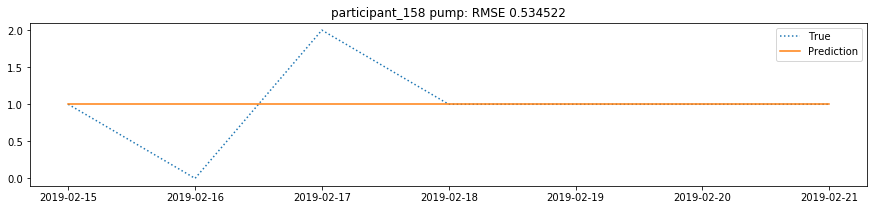

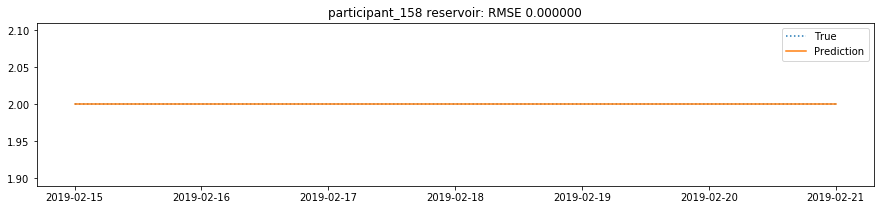

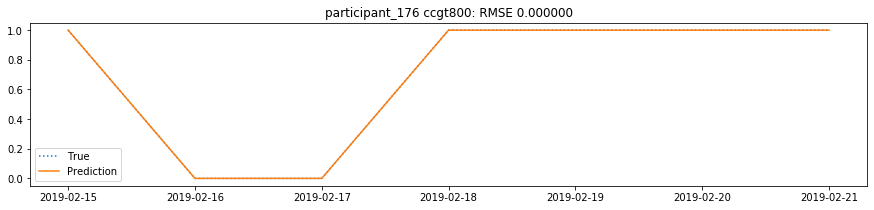

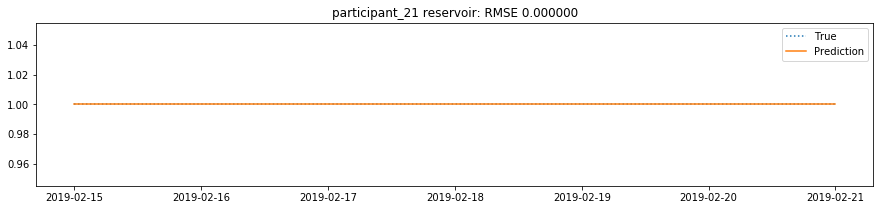

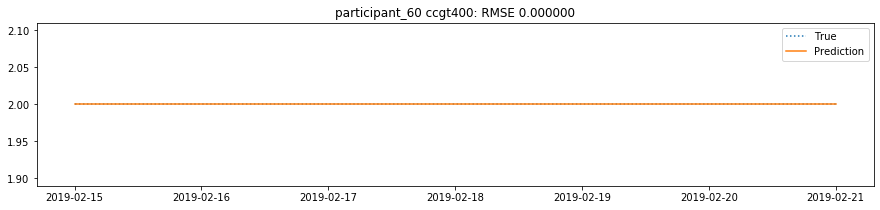

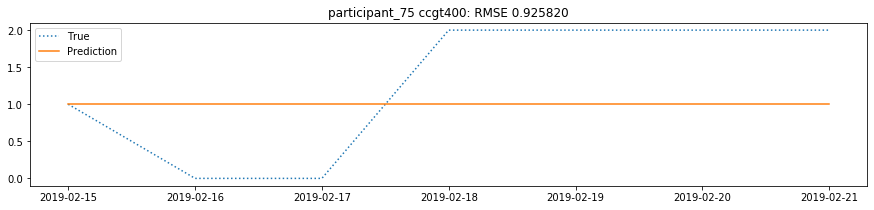

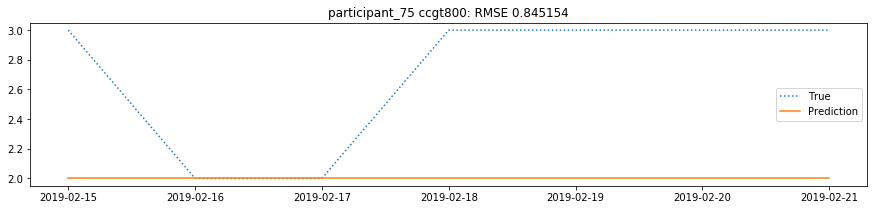

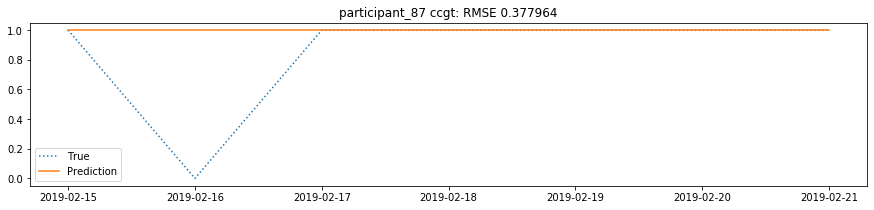

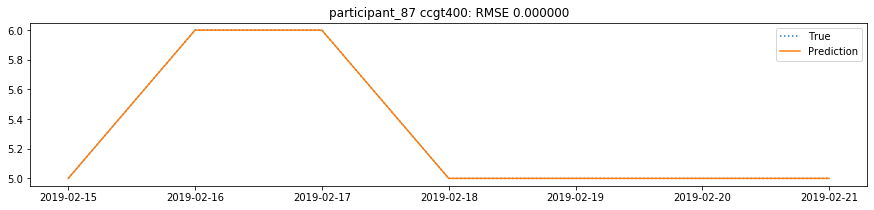

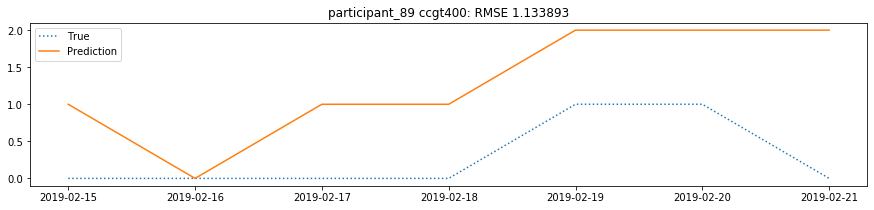

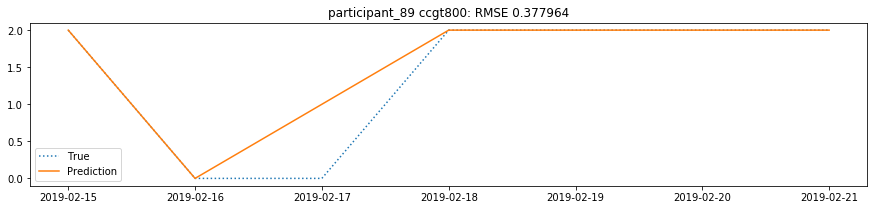

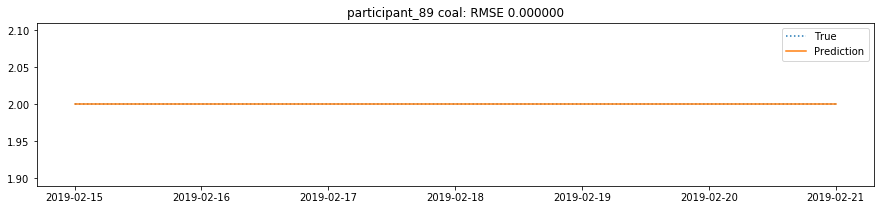

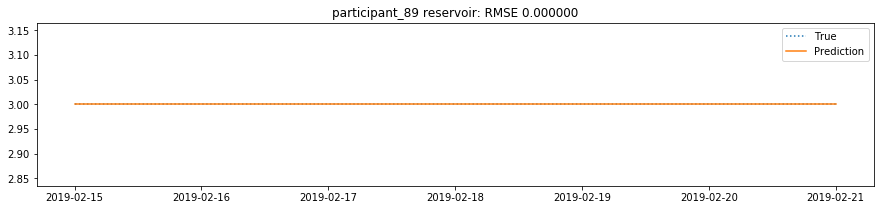

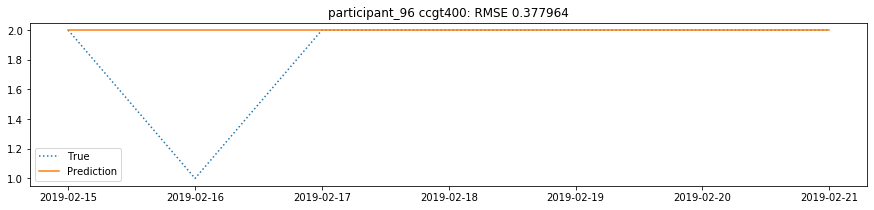

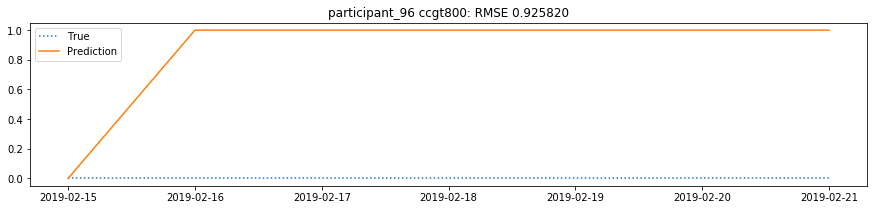

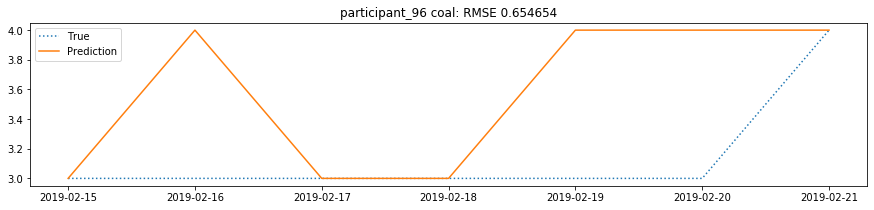

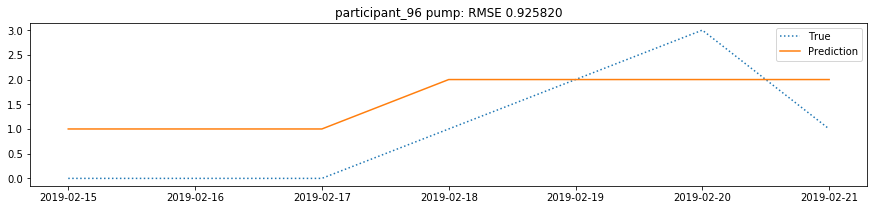

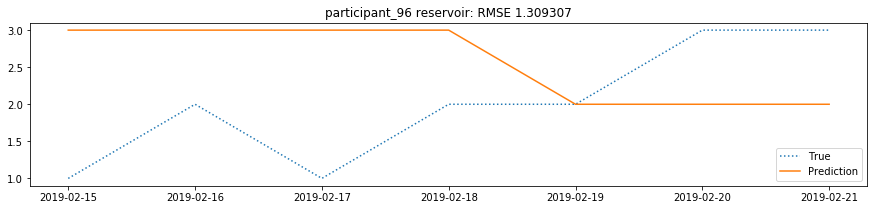

In [103]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams.update({'figure.max_open_warning': 50})

for i, pair in enumerate(unique_pairs):
    
    current_df_true = test_Y_df.n_acc_offers[(test_Y_df['participant'] == pair[0]) & (test_Y_df['technology'] == pair[1])]
    current_df_pred = test_Y_pred_df.n_acc_offers[(test_Y_pred_df['participant'] == pair[0]) & (test_Y_pred_df['technology'] == pair[1])]
    
    true = current_df_true.to_numpy()
    pred = current_df_pred.to_numpy()
    loss = np.sqrt(calculate_MSE(true,pred))
    
    print(pair[0],pair[1],loss)
    
    plt.figure(i,figsize=(15,3))
    plt.plot(current_df_true.index,true,label='True',ls=':')
    plt.plot(current_df_true.index,pred,label='Prediction')
    plt.legend()
    plt.title('{} {}: RMSE {:5f}'.format(pair[0],pair[1],loss))

#### Gradient Boosting (by Federico Minutoli)

The implementation of Gradient Boosting is included in the folder <i>gradboosting/src</i>:

- <i>decision_tree.py</i> contains the classes:
    - `Tree` which models a regression tree
    - `Node` which models a single node of the tree and contains the function `build` used to grow the regression tree according to the greedy solution inspired by XGBoost described in Section 4 of the report
    
    
- <i>gbm.py</i> contains the class `GBDT` used to create the gradient boosting machine


- <i>utils.py</i> contains a set of helpers functions: <i>calculate_MSE</i> to compute the Mean Square Error (MSE) whenever needed, *choose_CV_params* which is a generator of parameters' combinations given various lists, that was extensively used for V-Fold CV and the simple container class *Dataset* which groups an X and a Y, mimicking LightGBM's one

- <i>combinats_CV_params.py</i> is an helper script, which given a predetermined dict of possible parameters generates the desired amount of combinations and dumps to file as Pickle objects

Moreover on *V-Fold CV*, opting for a grid search solution was unfeasible. Indeed, by having approximately $6^5$ (5 values for each parameter) different combinations to try it would have taken over *12 years* unless some of the Gradient Boosting Machines stopped early due to the `early_stopping_round` metaparameter. Hence, I followed a random search approach which cut the combinatory space to a computable amount. This was especially crucial to launch batch jobs which ran V-Fold CV on the remote **FarmUI** cluster, as it was the only way to effectively try different combinations in a reasonable time.

In [19]:
import numpy as np
import pandas as pd
import sys

# Custom imports
from gradboosting.src.gbm   import GBDT
from gradboosting.src.utils import calculate_MSE

For the sake of simplicity the 5-Fold Cross Validation is executed with a 3 fixed combinations of parameters, just to demonstrate its purpose and functionality. A single round of cross-validation using the *Divide and conquer* approach should take somewhere around 15 minutes.

The parameters used are:

- `gamma`: the penalty associated to the increasing number of leaves in the tree
- `lambda`: the regularization paramter used in the objective function
- `learning_rate`: the shrinkage rate applied to the weights at each boosting round
- `max_depth`: the max number of levels the tree can grow into
- `max_features`: the percentage of random features to consider when subsampling looking for the best split
- `min_split_gain`: the minimum information gain a split can provide to be considered valid

`min_samples_leaf` and `min_samples_split` were fixed to 1 and 2 and thus are not part of the cross-validation discussion.

In [23]:
# # Uncomment the following lines to directly load the best models
# # per-participant generated on FarmUI and skip CV execution

# import pickle

# with open('./best_CV_info_GBM.pickle','rb') as f:
#      best_CV_info_GBM = pickle.load(f)

In [8]:
# Custom helper class
from gradboosting.src.utils import Dataset

from sklearn.model_selection import KFold

def launch_IREN_VFoldCV_GBM(training_df, params_combinats,
                            participants, seed=None, num_folds=5,
                            early_stopping_rounds=16,
                            out_features=['n_acc_offers', 'participant']):
    
    """
    Execute V-Fold CV tuned for IREN case study
    
    Parameters
    ------------
    training_df: Pandas dataframe
    Training set X
    
    params_combinats: list of dictionaries
    List of parameters combinations to be cross-validated
    
    participants: list
    List of participants given by IREN
    
    seed: int [default=None]
    If None non-repeatable fold split is executed
    
    num_folds: int [default=5]
    Number of folds for V-Fold CV
    
    early_stopping_rounds: int [default=16]
    Number of boosting rounds (CART models) in sequence
    among which the validation loss doesn't improve.
    
    This parameter is especially crucial, since a common
    procedure is to let num_boost_rounds be as high as
    you want and control the growth of the CART trees
    with a combination of early_stopping_rounds and
    learning_rate which should be inversely
    proportionale to avoid overfitting.
    
    out_features: list
    Columns to be dropped in the validation fold
    for the prediction
    
    """
    
    from datetime import datetime
    CV_start_time = datetime.now()
    
    # Output CV info per participant 
    best_CV_info = {}

    for participant in participants:
        best_CV_info[participant] = CVInfo()
        
    for params in params_combinats:
        print('Testing CV with params:', params)
        current_GBDT_models = {}

        for participant in participants:
            print("{}-Fold CV for participant:".format(num_folds), participant)

            KF_generator = KFold(n_splits=num_folds, random_state=seed)
            current_GBDT_models[participant] = []
            
            # # Divide and Conquer strategy
            # Extract information on a single participant

            X_train_Participant = training_df.loc[training_df.participant
                                        == participant].reset_index(drop=True)

            Y_train_Participant = X_train_Participant.n_acc_offers
            Y_pred_train_Participant = np.zeros(X_train_Participant.shape[0])

            X_train_Participant.drop(columns=out_features, inplace=True)

            CV_score = 0

            # Fit the CART learners on the current fold
            for fold_idx, (train_idx, valid_idx) in enumerate(
                                KF_generator.split(X_train_Participant, Y_train_Participant)):

                X_train, X_valid = X_train_Participant.loc[train_idx].to_numpy(), \
                        X_train_Participant.loc[valid_idx].to_numpy()

                Y_train, Y_valid = Y_train_Participant.iloc[train_idx].to_numpy(), \
                        Y_train_Participant.iloc[valid_idx].to_numpy()

                # early_stopping_rounds has been set to as low as 4
                # to make CV doable in a decent time. Hence, I was able
                # to interpret results over many combinations.
                model_GBDT = GBDT()
                model_GBDT.train(params, Dataset(X_train, Y_train), num_boost_round=1024,
                                    validation_set=Dataset(X_valid, Y_valid),
                                    early_stopping_rounds=early_stopping_rounds)

                current_GBDT_models[participant].append(model_GBDT)
                    
                Y_pred_valid = model_GBDT.predict(X_valid,
                            num_iterations=model_GBDT.best_iteration)

                valid_RMSE = np.sqrt(calculate_MSE(Y_valid, Y_pred_valid))
                # print("Participant: {}, at fold_idx {} with RMSE: {}\n" \
                #              .format(participant, fold_idx, valid_RMSE))

                CV_score += valid_RMSE / num_folds

            if best_CV_info[participant].check_score(CV_score,
                        current_GBDT_models[participant], params):
                print('Participant: {}, got a new best CV score: {} with params: {}\n' \
                                  .format(participant, CV_score, params))
    
    print('CV finished. Elapsed time: {}' \
                .format(datetime.now() - CV_start_time))
            
    return best_CV_info

In [9]:
# Set of parameters for on premises V-Fold CV

params_combinats = [
    {
        'gamma': 0.3,
        'lambda': 1.0,
        'learning_rate': 0.05,
        'max_depth': 5,
        'max_features': 0.33,
        'min_split_gain': 0.5
    },
    {
        'gamma': 0.1, 
        'lambda': 0.3,
        'learning_rate': 0.1,
        'max_depth': 3,
        'max_features': 0.50,
        'min_split_gain': 0.1
    },
    {
        'gamma': 0.3,
        'lambda': 1.0,
        'learning_rate': 0.01,
        'max_depth': 5,
        'max_features': 0.33,
        'min_split_gain': 0.3
    }
]

best_CV_info_GBM = launch_IREN_VFoldCV_GBM(training_df, params_combinats,
                            u_participants, early_stopping_rounds=16)

Testing CV with params: {'gamma': 0.3, 'lambda': 1.0, 'learning_rate': 0.05, 'max_depth': 5, 'max_features': 0.33, 'min_split_gain': 0.5}
5-Fold CV for participant: participant_116
Training until validation scores don't improve for 16 rounds.
Iteration   0, Training L2 error: 2.0962940000, Validation L2 error: 0.2289680000, Elapsed time: 0:00:00.740105
Iteration   8, Training L2 error: 0.0851830000, Validation L2 error: 1.1580970000, Elapsed time: 0:00:00.765444
Iteration  16, Training L2 error: 0.0851830000, Validation L2 error: 1.1580970000, Elapsed time: 0:00:00.847101
Early stopping. Best iteration is:
Iteration   3, Training's L2 error: 1.1580910000
Training finished. Elapsed time: 0:00:15.917958

Training until validation scores don't improve for 16 rounds.
Iteration   0, Training L2 error: 0.9501810000, Validation L2 error: 3.0995490000, Elapsed time: 0:00:00.663610
Iteration   8, Training L2 error: 0.0487830000, Validation L2 error: 0.8499140000, Elapsed time: 0:00:00.749800
It

##### V-Fold Cross Validation results

The list of the best  per-participant parameters for each CART model is available below, together with its corresponding RMSE.

In [24]:
global_rmse = 0
for participant, CV_info in best_CV_info_GBM.items():
    global_rmse += CV_info.score
    print(participant.capitalize(), CV_info.score, CV_info.params)
    
print('Global RMSE: {:3f}'.format(global_rmse/len(best_CV_info_GBM.items())))

Participant_116 0.9119216628586337 {'gamma': 0.3, 'lambda': 1.0, 'learning_rate': 0.05, 'max_depth': 5, 'max_features': 0.33, 'min_split_gain': 0.5}
Participant_120 0.7697847348235587 {'gamma': 0.1, 'lambda': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'max_features': 0.5, 'min_split_gain': 0.1}
Participant_146 1.3088900572624356 {'gamma': 0.3, 'lambda': 1.0, 'learning_rate': 0.05, 'max_depth': 5, 'max_features': 0.33, 'min_split_gain': 0.5}
Participant_158 1.3151635550753067 {'gamma': 0.3, 'lambda': 1.0, 'learning_rate': 0.01, 'max_depth': 5, 'max_features': 0.33, 'min_split_gain': 0.3}
Participant_176 0.8052881250788282 {'gamma': 0.3, 'lambda': 1.0, 'learning_rate': 0.01, 'max_depth': 5, 'max_features': 0.33, 'min_split_gain': 0.3}
Participant_21 0.7105163300850751 {'gamma': 0.3, 'lambda': 1.0, 'learning_rate': 0.05, 'max_depth': 5, 'max_features': 0.33, 'min_split_gain': 0.5}
Participant_60 1.314916729181168 {'gamma': 0.1, 'lambda': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'max_fea

After the extraction of the best per-participant parameters from the parallel V-Fold CV, the validation scores saw a really big improvement, aside from Participant_87 and Participant_96 that still had a *RMSE* >= 1. For the former, the problem may lie in the 2 non-uniform technologies that he has, since they range from 0-1 n_acc_offers in the first one, to 5-6 in the second one. For the latter, instead, the problem may lie on him being tied at the top of who has the most technologies, 5. With these many time series, an approach more focused on the individual technologies may have been more suitable.

In [21]:
# # Uncomment the following lines to override the per-participant
# # CART models generated in the previous blocks

with open('best_CV_info_GBM.pickle', 'wb') as f:
    pickle.dump(best_CV_info_GBM, f)

##### Testing IREN data

A prediction of the fresh test set is computed, using the best models for each participant.

In [21]:
import gc

# Load CSV test XY
test_X_df = pd.read_csv('./preprocessing/generated_csv/IREN_test_X.csv', index_col='date', header=0, sep=';')
test_Y_df = pd.read_csv('./preprocessing/generated_csv/IREN_test_Y.csv', index_col='date', header=0, sep=';')

# Encode technologies according to the previously
# saved encoding scheme enc_technologies
test_X_df.technology = enc_technologies.transform(test_X_df.technology)

# Normalize the DF on the following multi-indexes to
# extract the target n_acc_offers in a fixed order
test_Y_target_GBM = test_Y_df.pivot_table(index='date',
                            columns=['participant', 'technology']) \
                    .swaplevel(axis=1).sort_index(1).to_numpy().ravel('K')

# Columns dropped from the test set input X
out_features=['date', 'participant']

# Number of folds used in V-Fold CV
num_folds = 5

# Init the Y predictions array
test_Y_pred_GBM = []

for participant in best_CV_info_GBM.keys():
    print("Extracting {}'s data...".format(participant.capitalize()))

    ## Divide and Conquer strategy
    
    # Extract the participant XY
    X_test_Participant = test_X_df.loc[test_X_df.participant
                                == participant].reset_index()
    
    # Collect dates in X
    X_test_Participant_date = X_test_Participant.date

    # Drop undesired columns
    X_test_Participant.drop(columns=out_features, inplace=True)
    
    # Init the per-participant Y predictions array
    Y_pred_test_Participant = np.zeros(X_test_Participant.shape[0])
    
    test_single_Y_df = None
  
    # Loop for each per-participant model
    for fold_idx in range(num_folds):
        # Extract the current model
        model_GBDT = best_CV_info_GBM[participant].models[fold_idx]
        
        # Accumulate the predictions
        Y_pred_test_Participant += model_GBDT.predict(X_test_Participant.to_numpy(),
                num_iterations=model_GBDT.best_iteration) / num_folds
        
        gc.collect()
        
    # Rounding since n_acc_offers are integers in N >= 0
    Y_pred_test_Participant = np.round(Y_pred_test_Participant).astype(int)
    Y_pred_test_Participant[Y_pred_test_Participant < 0] = 0
                            
    # Create the DF entry
    test_single_Y_df = pd.DataFrame({'technology': enc_technologies.inverse_transform(
                                            X_test_Participant.technology),
                            'date': X_test_Participant_date, 'participant': participant,
                            'n_acc_offers': Y_pred_test_Participant})
    
    test_Y_pred_GBM.append(test_single_Y_df)
    
    print("{} scoring is completed\n".format(participant.capitalize()))
    gc.collect()
        
test_Y_pred_GBM_df = pd.concat(test_Y_pred_GBM)

# Normalize the DF on the same multi-indexes I
# used to extract the target n_acc_offers from test_Y_df
test_Y_pred_target_GBM = test_Y_pred_GBM_df.pivot_table(index='date',
                                        columns=['participant', 'technology']) \
                                .swaplevel(axis=1).sort_index(1).to_numpy().ravel('K')

Extracting Participant_116's data...
Participant_116 scoring is completed

Extracting Participant_120's data...
Participant_120 scoring is completed

Extracting Participant_146's data...
Participant_146 scoring is completed

Extracting Participant_158's data...
Participant_158 scoring is completed

Extracting Participant_176's data...
Participant_176 scoring is completed

Extracting Participant_21's data...
Participant_21 scoring is completed

Extracting Participant_60's data...
Participant_60 scoring is completed

Extracting Participant_75's data...
Participant_75 scoring is completed

Extracting Participant_87's data...
Participant_87 scoring is completed

Extracting Participant_89's data...
Participant_89 scoring is completed

Extracting Participant_96's data...
Participant_96 scoring is completed



##### Performance and plots

Global RMSE error below:

In [22]:
print('Test RMSE error with GBDT: {}'.format(np.sqrt(calculate_MSE(
                test_Y_target_GBM, test_Y_pred_target_GBM))))

Test RMSE error with GBDT: 1.0151907431108496


##### Thoughts on test

Unfortunately the GBM model showed to be really struggling at predicting the target n_acc_offers when the offers where above 3. It also may have overfitted the data, since many of the predictions were flat. So probably upping `early_boosting_rounds` may be a good choice, if it could run a little faster. Honestly, it was quite surprising given the amount of combinations (almost 500) tried during the V-Fold CV and that it actually responded pretty well on the sample data that was hosted at [Light GBM's GitHub](https://github.com/Microsoft/LightGBM/tree/master/examples/regression]) with a test RMSE of 0.45875 against LightGBM's 0.45652.

The RMSE for each (`participant`,`technology`) is computed and shown.<br>
The plots of all the forecasted time series are provided vs the ground truth in test_Y_df

Participant_116 ccgt 0.0
Participant_116 ccgt400 0.7559289460184544
Participant_116 ccgt800 0.6546536707079771
Participant_116 pump 0.0
Participant_116 reservoir 0.9258200997725514
Participant_120 ccgt800 0.0
Participant_146 pump 0.8451542547285166
Participant_146 reservoir 0.0
Participant_158 ccgt400 0.9258200997725514
Participant_158 ccgt800 0.9258200997725514
Participant_158 pump 1.1338934190276817
Participant_158 reservoir 0.7559289460184544
Participant_176 ccgt800 0.0
Participant_21 reservoir 1.0
Participant_60 ccgt400 1.0
Participant_75 ccgt400 1.558387444947959
Participant_75 ccgt800 1.7728105208558367
Participant_87 ccgt 0.9258200997725514
Participant_87 ccgt400 2.32992949004287
Participant_89 ccgt400 0.3779644730092272
Participant_89 ccgt800 1.0690449676496976
Participant_89 coal 1.0
Participant_89 reservoir 1.0
Participant_96 ccgt400 0.6546536707079771
Participant_96 ccgt800 0.0
Participant_96 coal 1.1952286093343936
Participant_96 pump 1.4638501094227998
Participant_96 reser

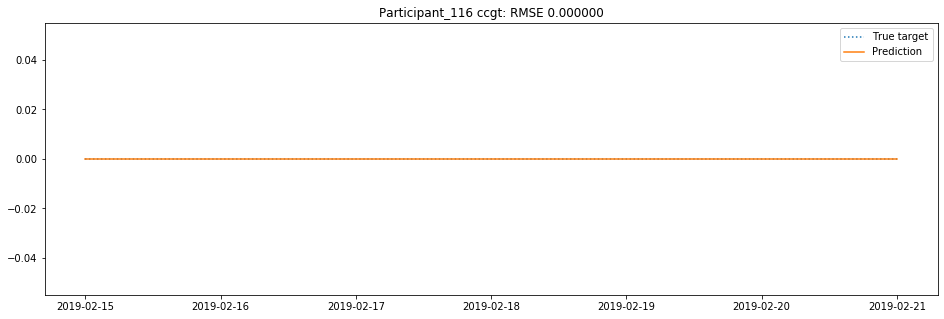

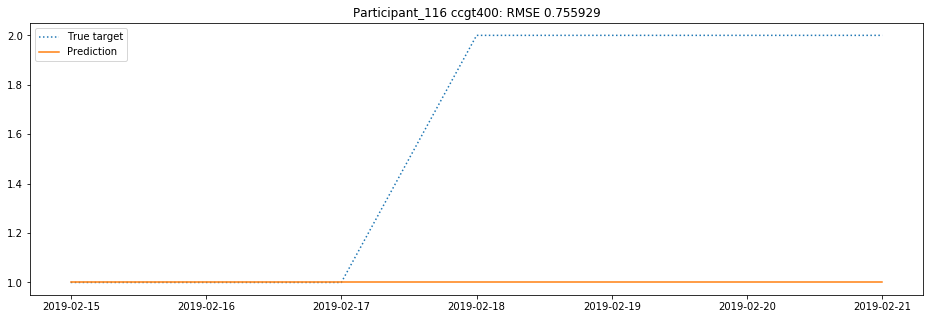

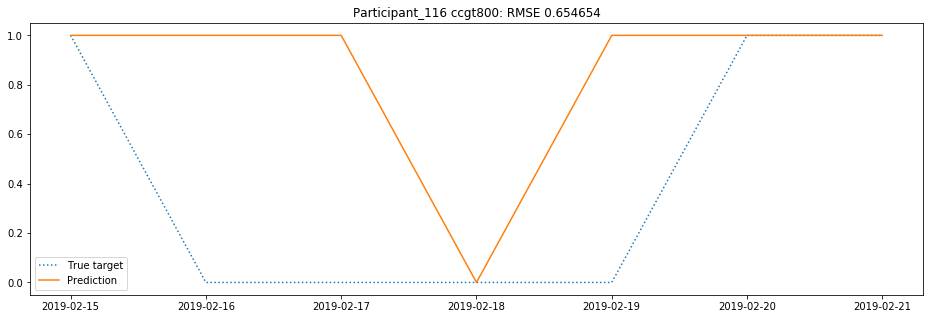

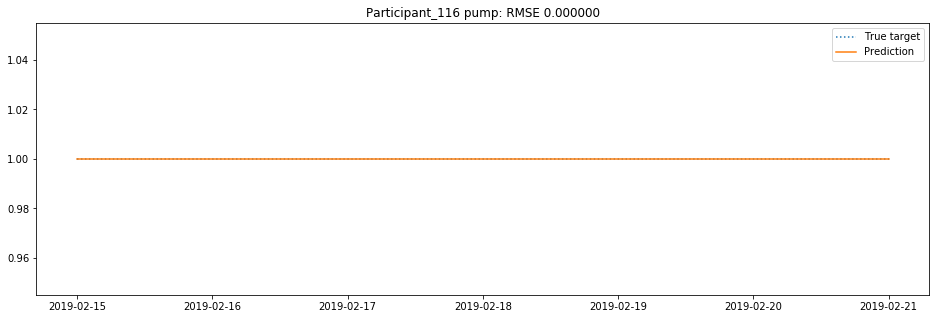

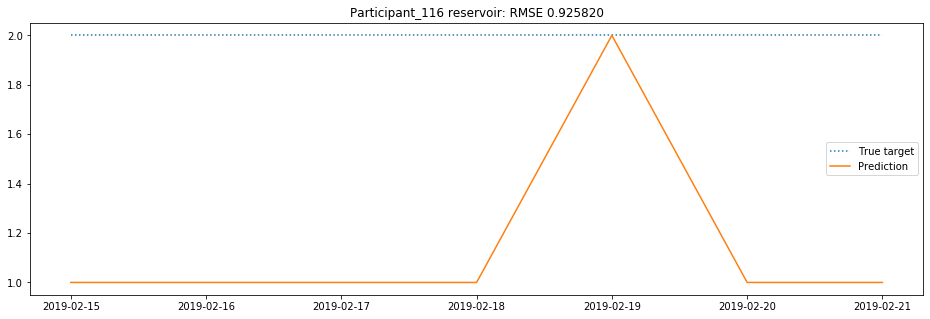

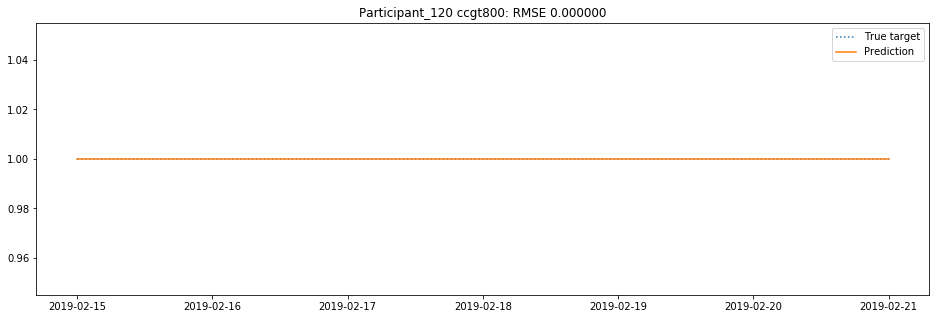

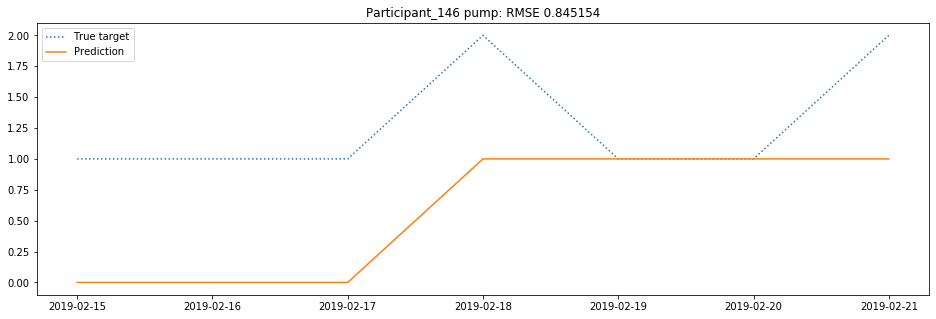

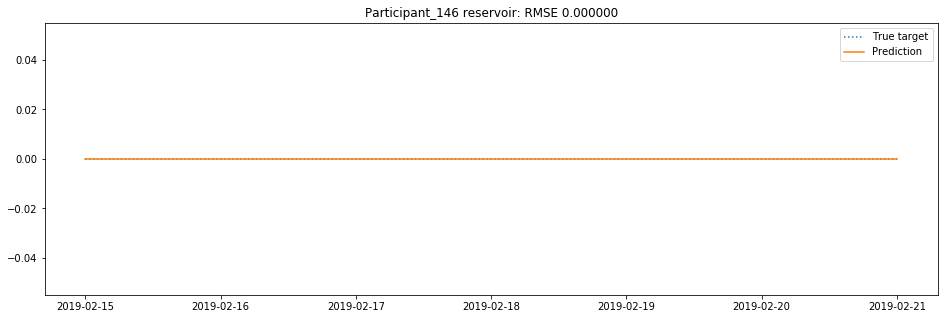

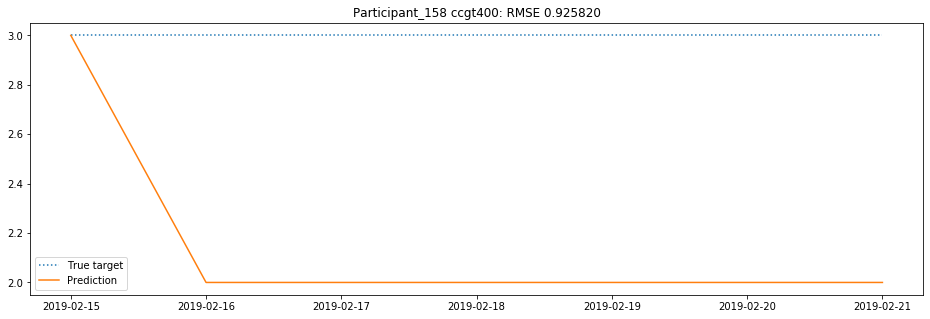

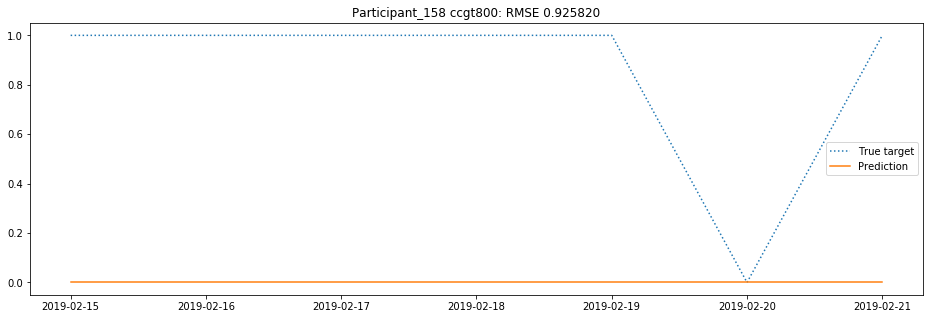

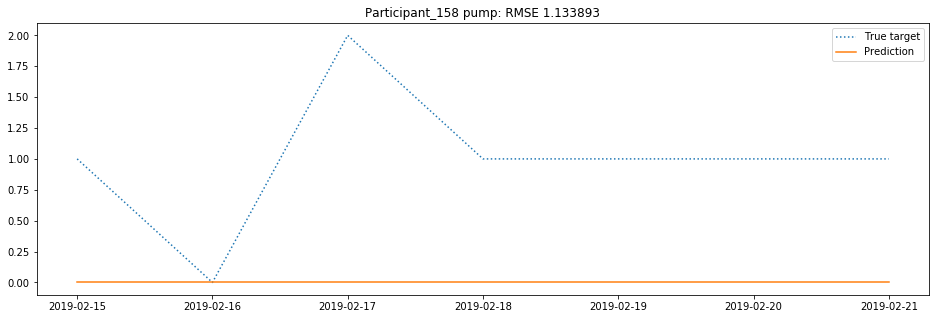

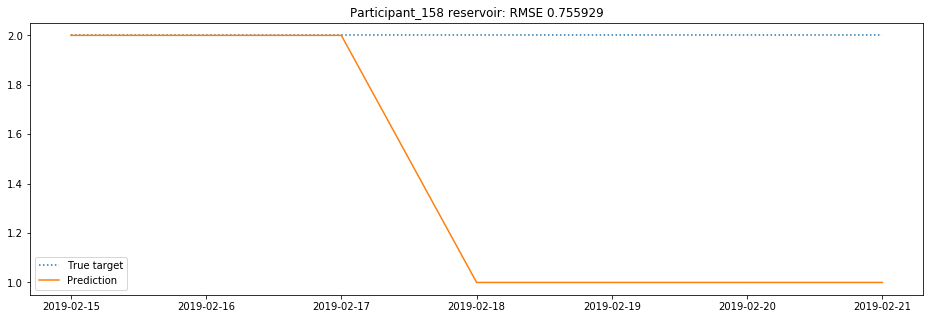

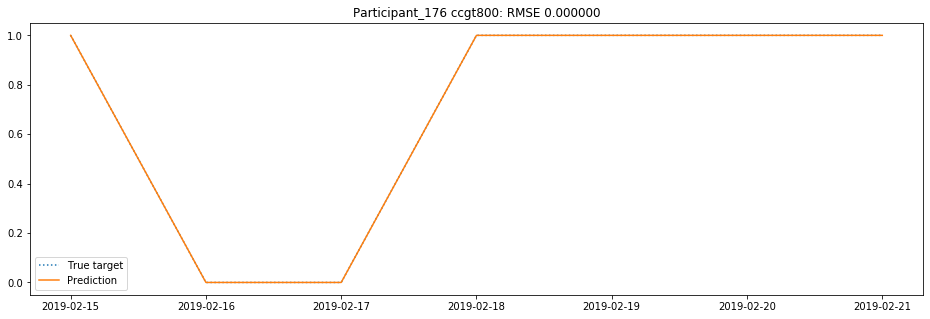

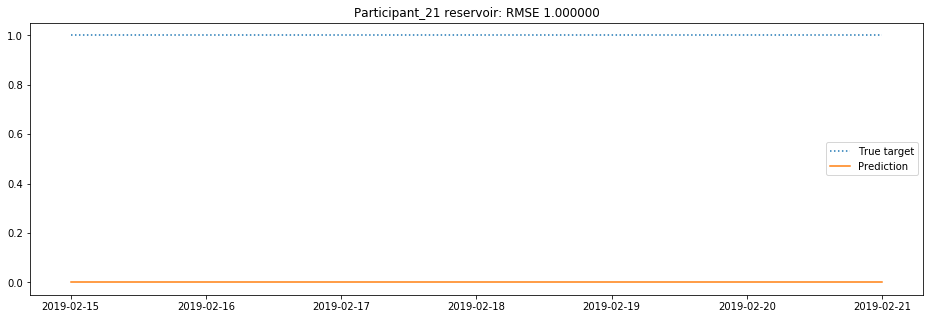

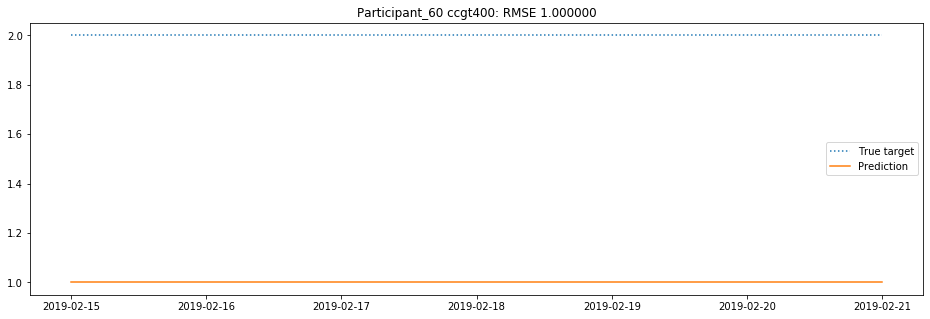

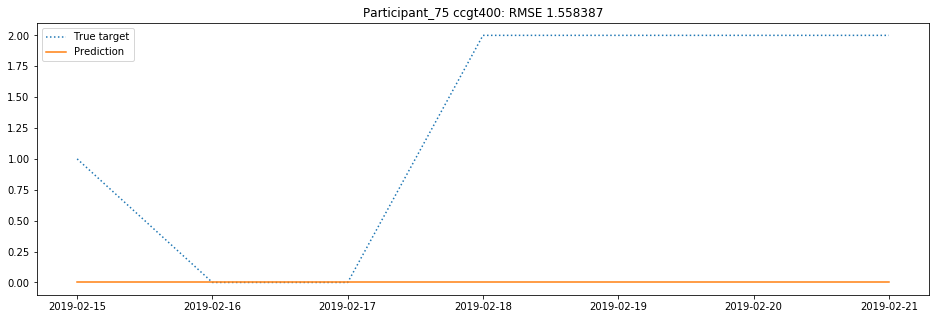

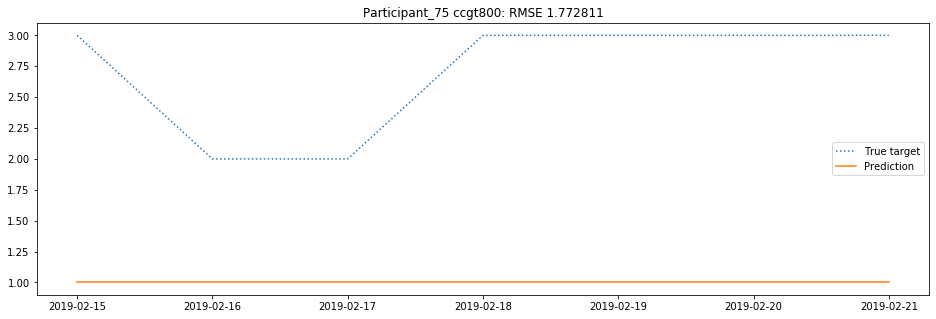

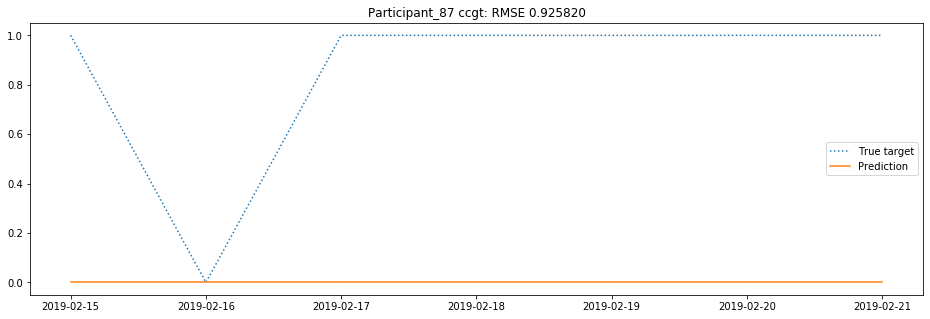

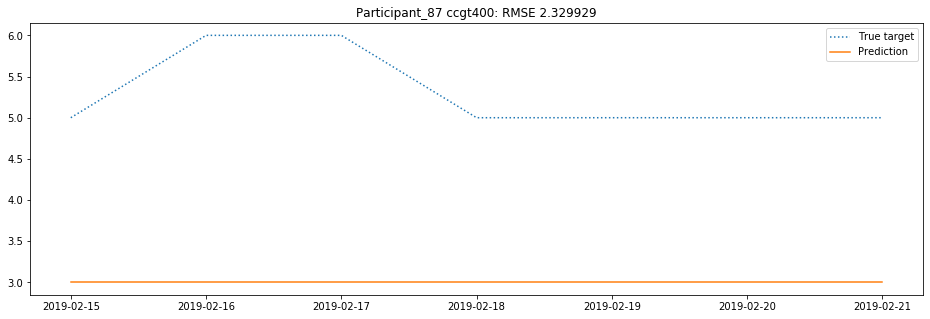

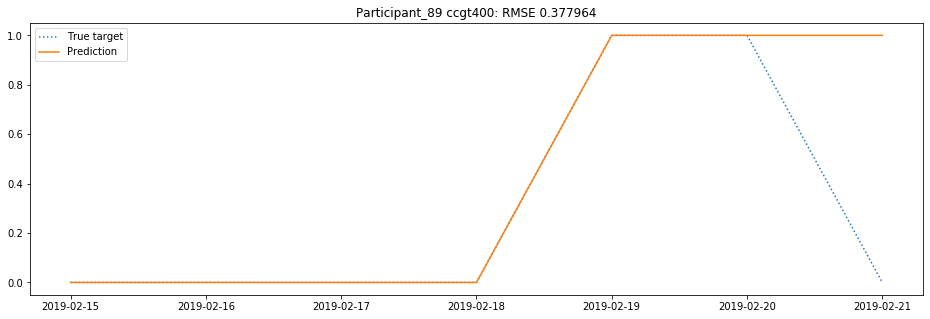

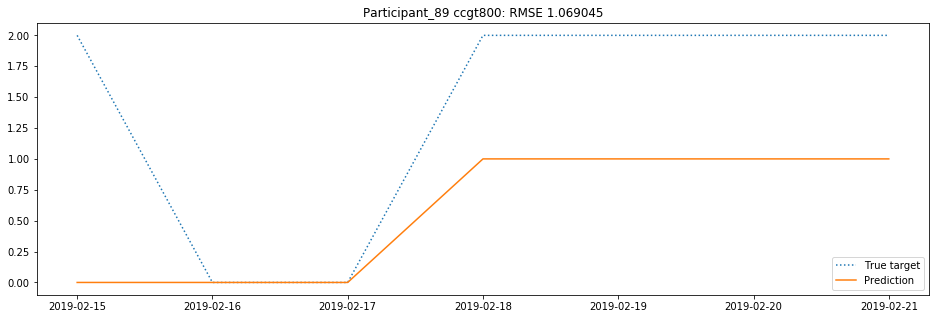

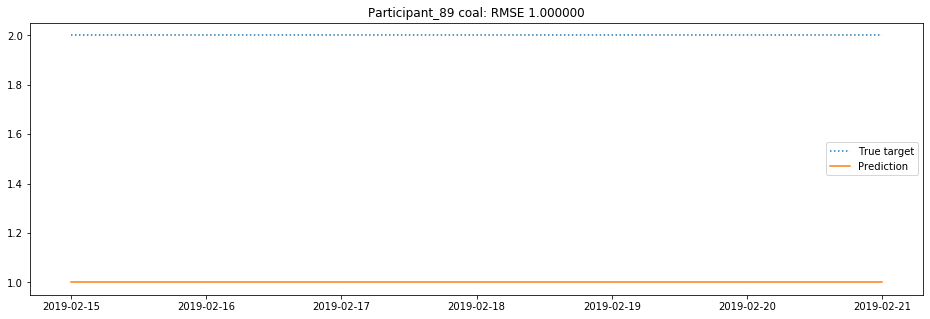

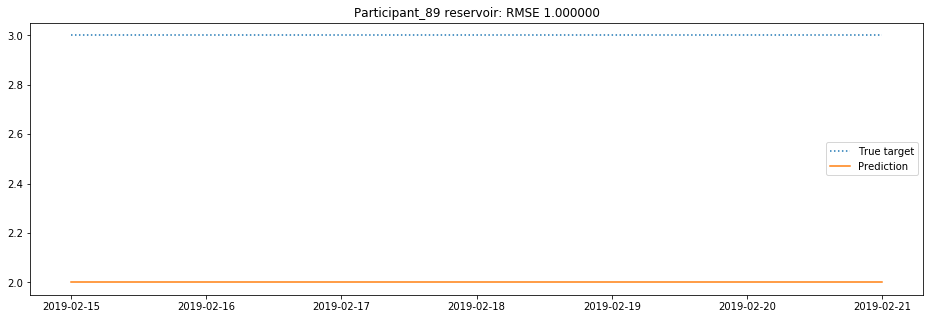

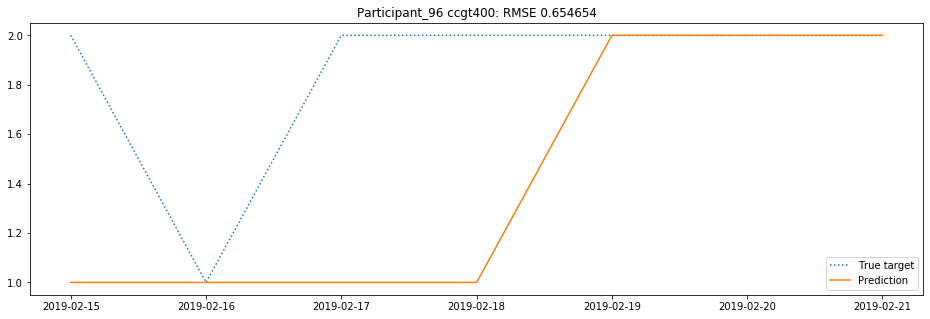

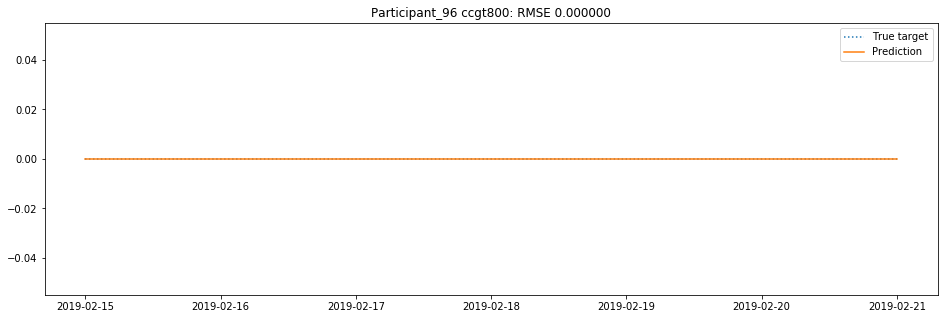

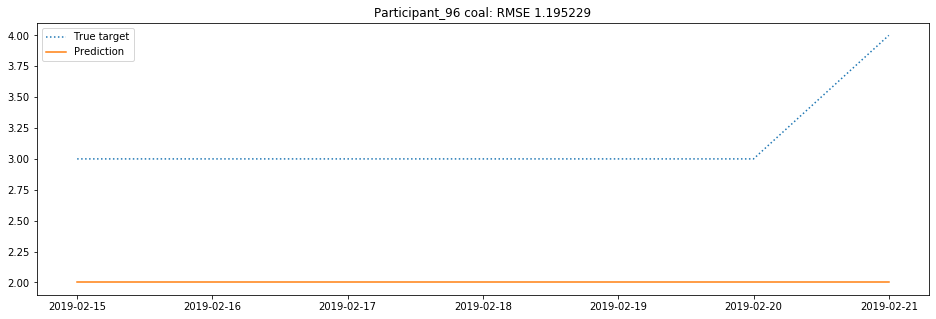

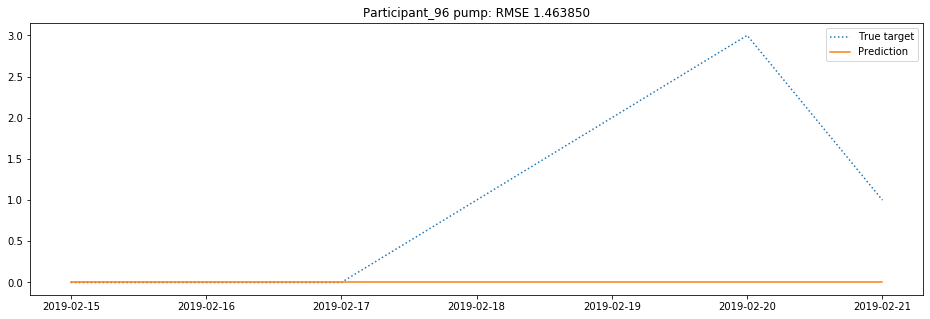

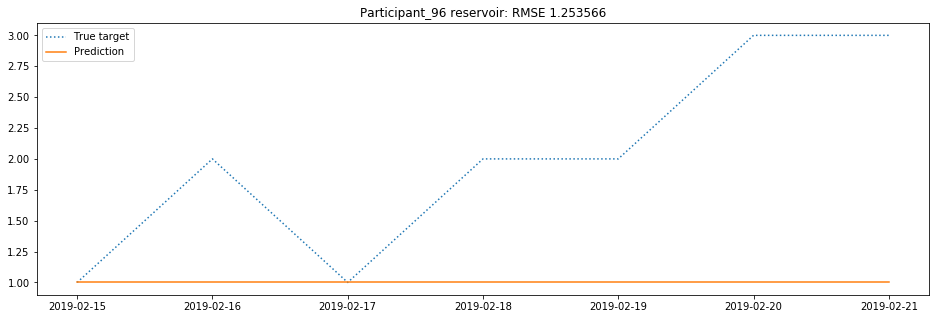

In [23]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams.update({'figure.max_open_warning': 50})

for i, pair in enumerate(unique_pairs):
    
    current_true_Y_df = test_Y_df.n_acc_offers[(test_Y_df['participant'] == pair[0]) \
                                & (test_Y_df['technology'] == pair[1])]
    current_pred_Y_df = test_Y_pred_GBM_df.n_acc_offers[(test_Y_pred_GBM_df['participant'] == pair[0]) \
                                & (test_Y_pred_GBM_df['technology'] == pair[1])]
    
    true_Y = current_true_Y_df.to_numpy()
    pred_Y = current_pred_Y_df.to_numpy()
    
    current_MSE = np.sqrt(calculate_MSE(true_Y, pred_Y))
    
    print(pair[0].capitalize(), pair[1], current_MSE)
    
    plt.figure(i,figsize=(16,5))
    
    plt.title('{} {}: RMSE {:5f}'.format(pair[0].capitalize(), pair[1], current_MSE))
    
    plt.plot(current_true_Y_df.index, true_Y, label='True target', ls=':')
    plt.plot(current_true_Y_df.index, pred_Y, label='Prediction')
        
    plt.legend()

#### LightGBM comparisons

At C1A0 Hackathon we actually used Microsoft's recent LightGBM library, which proved to have amazing speed and accuracy if compared with all the other popular choices. Here below we provide a brief analysis on V-Fold CV and test performance of LightGBM itself.

In [30]:
from tqdm.notebook import tqdm
from sklearn.model_selection import KFold

import lightgbm as lgb
import gc

In [ ]:
# Uncomment to skip CV
# import pickle

# with open('./best_CV_infos_LGBM.pickle', 'rb') as f:
#     best_CV_infos_LGBM = pickle.load(f)

In [27]:
def launch_IREN_VFoldCV_lightGBM(training_df, params_combinats,
                            participants, seed=32, num_folds=5,
                            cat_features=['technology'],
                            out_features=['n_acc_offers', 'participant']):
    """V-Fold CV tuned for IREN case study"""
    
    from datetime import datetime
    CV_start_time = datetime.now()
    
    # Output CV info per participant 
    best_CV_infos_LGBM = {}

    for participant in participants:
        best_CV_infos_LGBM[participant] = CVInfo()
        
    for params in params_combinats:
        print('Testing CV with params:', params)
        current_GBDT_models = {}

        for participant in participants:
            print("{}-Fold CV for participant:".format(num_folds), participant)

            KF_generator = KFold(n_splits=num_folds, random_state=seed)
            current_GBDT_models[participant] = []

            # Separate current XY sets
            X_train_Participant = training_df.loc[training_df.participant
                                        == participant].reset_index(drop=True)

            Y_train_Participant = X_train_Participant.n_acc_offers
            X_train_Participant.drop(columns=out_features, inplace=True)

            CV_score = 0

            # Fit the CART learners on each fold
            for fold_idx, (train_idx, valid_idx) in enumerate(
                                KF_generator.split(X_train_Participant, Y_train_Participant)):

                X_train, X_valid = X_train_Participant.loc[train_idx], \
                        X_train_Participant.loc[valid_idx]

                Y_train, Y_valid = Y_train_Participant.iloc[train_idx], \
                        Y_train_Participant.iloc[valid_idx]
                
                D_train = lgb.Dataset(X_train, label=Y_train, categorical_feature=cat_features)
                D_valid = lgb.Dataset(X_valid, label=Y_valid, categorical_feature=cat_features)

                watchlist = [D_train, D_valid]
                
                model_LGBM = lgb.train(params, train_set=D_train, num_boost_round=3000, 
                              valid_sets=watchlist, verbose_eval=101, early_stopping_rounds=125)
        
                current_GBDT_models[participant].append(model_LGBM)

                Y_pred_valid = model_LGBM.predict(X_valid,
                                    num_iteration=model_LGBM.best_iteration)

                validation_RMSE = np.sqrt(calculate_MSE(Y_valid, Y_pred_valid))       
                CV_score += validation_RMSE / num_folds
                print("{} at fold_idx {} with RMSE: {}\n" \
                            .format(participant.capitalize(), fold_idx, validation_RMSE))
                
                gc.collect()

            if best_CV_infos_LGBM[participant].check_score(CV_score,
                        current_GBDT_models[participant], params):
                print('{} got a new best CV score: {} with params: {}\n' \
                            .format(participant.capitalize(), CV_score, params))
    
    print('CV finished. Elapsed time: {}' \
                .format(datetime.now() - CV_start_time))
            
    return best_CV_infos_LGBM

In [28]:
# Parameters used at C1A0 Hackhaton
params_combinats = [
    {
        "objective": "regression",
        "num_leaves": 50,
        "learning_rate": 0.3,
        "bagging_fraction": 0.90,
        "feature_fraction": 0.87,
        "metric": "rmse"
    },
    {
        "objective": "regression",
        "num_leaves": 50,
        "learning_rate": 0.1,
        "bagging_fraction": 0.90,
        "feature_fraction": 0.75,
        "metric": "rmse"
    },
    {
        "objective": "regression",
        "num_leaves": 35,
        "learning_rate": 0.05,
        "bagging_fraction": 0.90,
        "feature_fraction": 0.75,
        "metric": "rmse"
    }
]

##### Launch V-Fold CV

In [31]:
best_CV_infos_LGBM = launch_IREN_VFoldCV_lightGBM(training_df, params_combinats,
                            u_participants, num_folds=5)

Testing CV with params: {'objective': 'regression', 'num_leaves': 50, 'learning_rate': 0.3, 'bagging_fraction': 0.9, 'feature_fraction': 0.87, 'metric': 'rmse'}
5-Fold CV for participant: participant_116
Training until validation scores don't improve for 125 rounds
[101]	training's rmse: 0.0303499	valid_1's rmse: 1.12681
Early stopping, best iteration is:
[6]	training's rmse: 0.208101	valid_1's rmse: 0.967838
Participant_116 at fold_idx 0 with RMSE: 0.9678381265260487

Training until validation scores don't improve for 125 rounds
[101]	training's rmse: 0.028562	valid_1's rmse: 0.435972
Early stopping, best iteration is:
[8]	training's rmse: 0.169932	valid_1's rmse: 0.389224
Participant_116 at fold_idx 1 with RMSE: 0.7443150208898344

Training until validation scores don't improve for 125 rounds
[101]	training's rmse: 0.0272207	valid_1's rmse: 0.542783
Early stopping, best iteration is:
[1]	training's rmse: 0.576599	valid_1's rmse: 0.383504
Participant_116 at fold_idx 2 with RMSE: 0.383

In [32]:
import json

global_rmse = 0
for participant, CV_info in best_CV_infos_LGBM.items():
    global_rmse += CV_info.score
    print(participant.capitalize(), 'scored {}, with params: {}\n'
                  .format(CV_info.score, json.dumps(CV_info.params, indent=2)))
    
print('Global RMSE: {:3f}'.format(global_rmse/len(best_CV_infos_LGBM.items())))

Participant_116 scored 0.572827925093408, with params: {
  "objective": "regression",
  "num_leaves": 35,
  "learning_rate": 0.05,
  "bagging_fraction": 0.9,
  "feature_fraction": 0.75,
  "metric": "rmse"
}

Participant_120 scored 0.4195865788113713, with params: {
  "objective": "regression",
  "num_leaves": 50,
  "learning_rate": 0.3,
  "bagging_fraction": 0.9,
  "feature_fraction": 0.87,
  "metric": "rmse"
}

Participant_146 scored 0.6271380505060996, with params: {
  "objective": "regression",
  "num_leaves": 50,
  "learning_rate": 0.1,
  "bagging_fraction": 0.9,
  "feature_fraction": 0.75,
  "metric": "rmse"
}

Participant_158 scored 0.5266296295398636, with params: {
  "objective": "regression",
  "num_leaves": 50,
  "learning_rate": 0.3,
  "bagging_fraction": 0.9,
  "feature_fraction": 0.87,
  "metric": "rmse"
}

Participant_176 scored 0.451099228170429, with params: {
  "objective": "regression",
  "num_leaves": 50,
  "learning_rate": 0.3,
  "bagging_fraction": 0.9,
  "feature_

In [34]:
with open('best_CV_infos_LGBM.pickle', 'wb') as f:
    pickle.dump(best_CV_infos_LGBM, f)

##### Testing IREN data

In [24]:
out_features=['date', 'participant']

num_folds = 5

test_Y_pred_LGBM = []

for participant in u_participants:
    print("Extracting {}'s data...".format(participant.capitalize()))

    # Separate current XY sets
    X_test_Participant = test_X_df.loc[test_X_df.participant
                                == participant].reset_index()
    
    # Collect dates in X
    X_test_Participant_date = X_test_Participant.date

    X_test_Participant.drop(columns=out_features, inplace=True)
    Y_pred_test_Participant = np.zeros(X_test_Participant.shape[0])
    
    test_single_Y_df = None
  
    for fold_idx in range(num_folds):
        model_LGBM = best_CV_infos_LGBM[participant].models[fold_idx]
        
        Y_pred_test_Participant += model_LGBM.predict(X_test_Participant,
                num_iteration=model_LGBM.best_iteration) / num_folds
                
        gc.collect()
        
    # Rounding since n_acc_offers are integers in N >= 0
    Y_pred_test_Participant = np.round(Y_pred_test_Participant).astype(int)
    Y_pred_test_Participant[Y_pred_test_Participant < 0] = 0
                      
    # Create the participant's DF entry
    test_single_Y_df = pd.DataFrame({'technology': enc_technologies.inverse_transform(
                                            X_test_Participant.technology),
                            'date': X_test_Participant_date, 'participant': participant,
                            'n_acc_offers': Y_pred_test_Participant})
    
    test_Y_pred_LGBM.append(test_single_Y_df)
    
    print("{} scoring is completed\n".format(participant.capitalize()))
    gc.collect()
        
test_Y_pred_LGBM_df = pd.concat(test_Y_pred_LGBM)

# Normalize the DF on the same multi-indexes I
# used to extract the target n_acc_offers from test_Y_df
test_Y_pred_target_LGBM = test_Y_pred_LGBM_df.pivot_table(index='date',
                                        columns=['participant', 'technology']) \
                                .swaplevel(axis=1).sort_index(1).to_numpy().ravel('K')

Extracting Participant_116's data...
Participant_116 scoring is completed

Extracting Participant_120's data...
Participant_120 scoring is completed

Extracting Participant_146's data...
Participant_146 scoring is completed

Extracting Participant_158's data...
Participant_158 scoring is completed

Extracting Participant_176's data...
Participant_176 scoring is completed

Extracting Participant_21's data...
Participant_21 scoring is completed

Extracting Participant_60's data...
Participant_60 scoring is completed

Extracting Participant_75's data...
Participant_75 scoring is completed

Extracting Participant_87's data...
Participant_87 scoring is completed

Extracting Participant_89's data...
Participant_89 scoring is completed

Extracting Participant_96's data...
Participant_96 scoring is completed



##### Performance and plots

In [25]:
print('Test RMSE error with LGBM: {}'.format(np.sqrt(calculate_MSE(
                test_Y_target_GBM, test_Y_pred_target_LGBM))))

Test RMSE error with LGBM: 0.6226998490772391


Participant_116 ccgt 1.0
Participant_116 ccgt400 0.7559289460184544
Participant_116 ccgt800 0.7559289460184544
Participant_116 pump 0.0
Participant_116 reservoir 0.6546536707079771
Participant_120 ccgt800 0.0
Participant_146 pump 0.6546536707079771
Participant_146 reservoir 1.0
Participant_158 ccgt400 0.0
Participant_158 ccgt800 0.8451542547285166
Participant_158 pump 0.8451542547285166
Participant_158 reservoir 0.0
Participant_176 ccgt800 0.3779644730092272
Participant_21 reservoir 0.0
Participant_60 ccgt400 0.0
Participant_75 ccgt400 0.5345224838248488
Participant_75 ccgt800 0.0
Participant_87 ccgt 0.3779644730092272
Participant_87 ccgt400 0.5345224838248488
Participant_89 ccgt400 0.9258200997725514
Participant_89 ccgt800 0.5345224838248488
Participant_89 coal 0.0
Participant_89 reservoir 0.0
Participant_96 ccgt400 0.3779644730092272
Participant_96 ccgt800 1.0
Participant_96 coal 0.3779644730092272
Participant_96 pump 1.3093073414159542
Participant_96 reservoir 0.6546536707079771


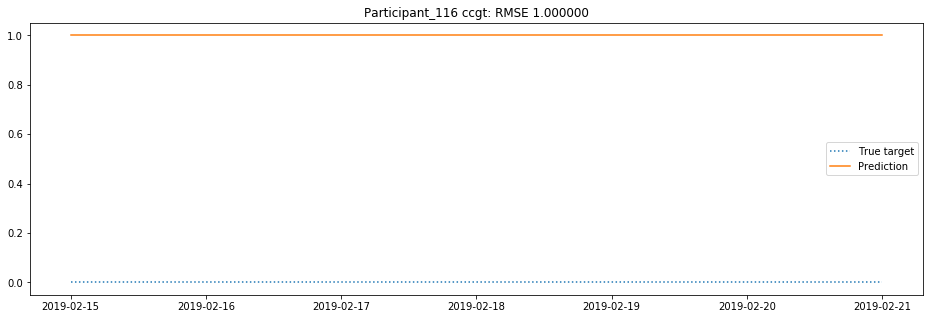

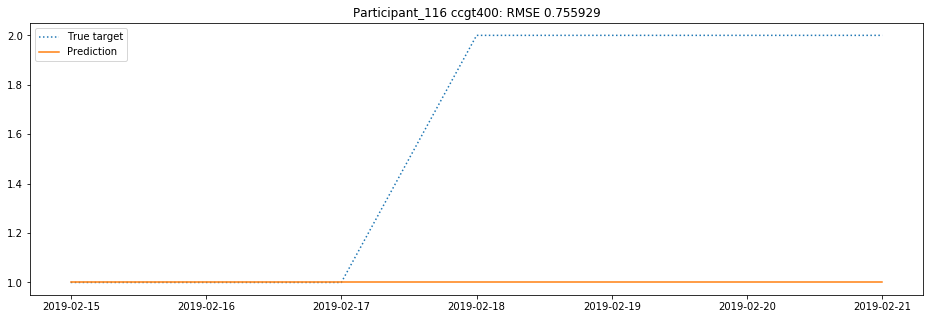

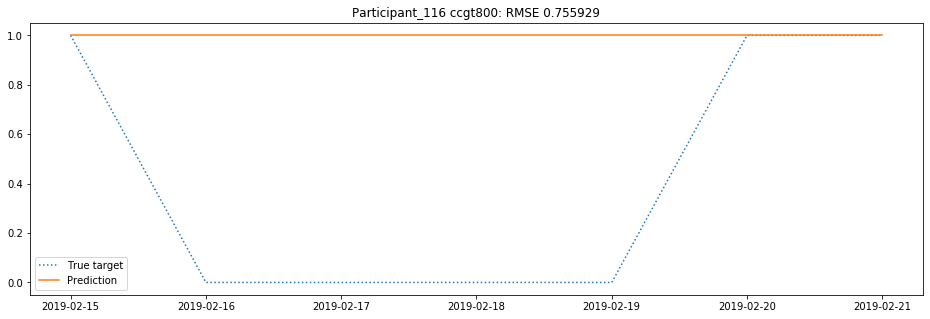

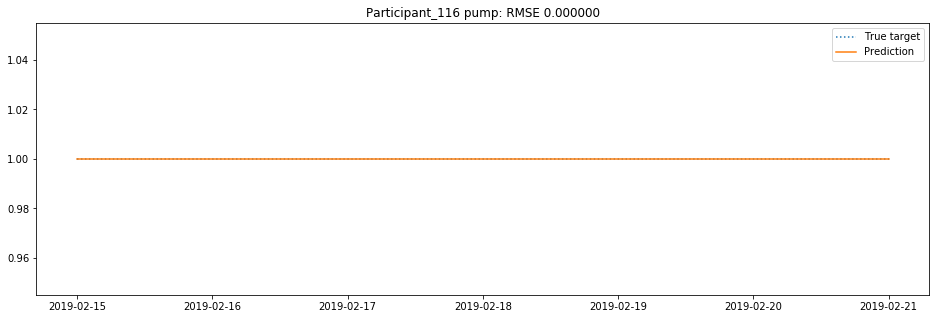

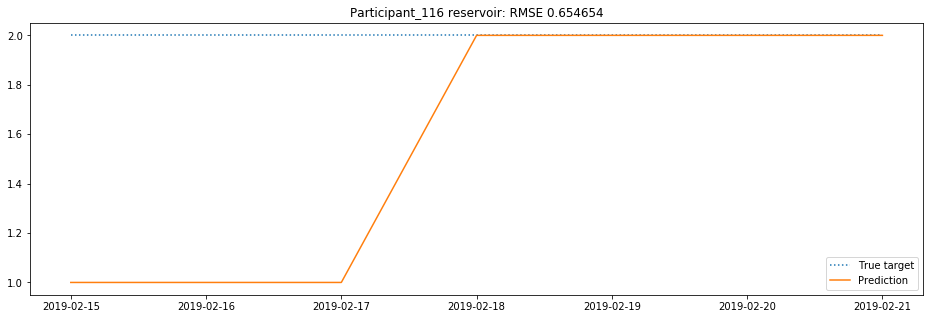

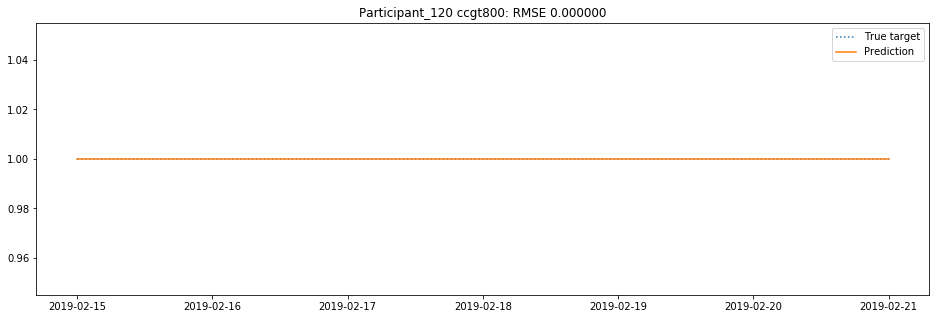

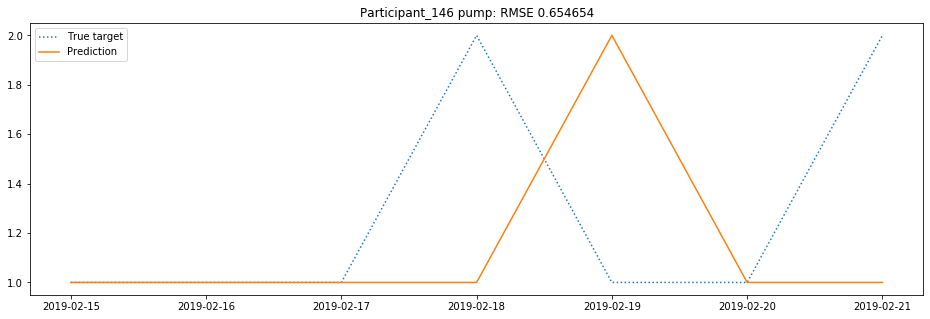

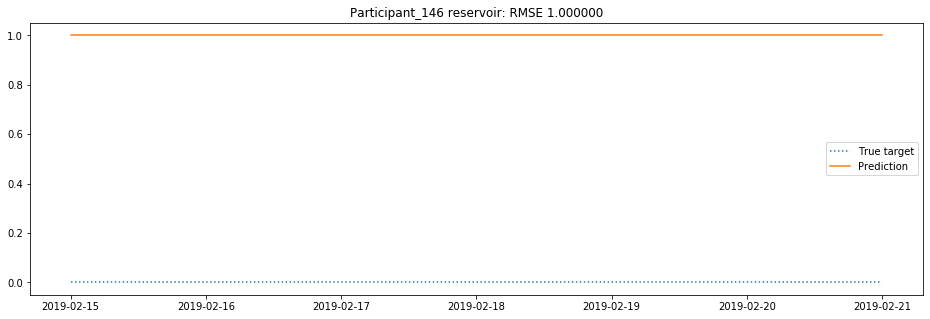

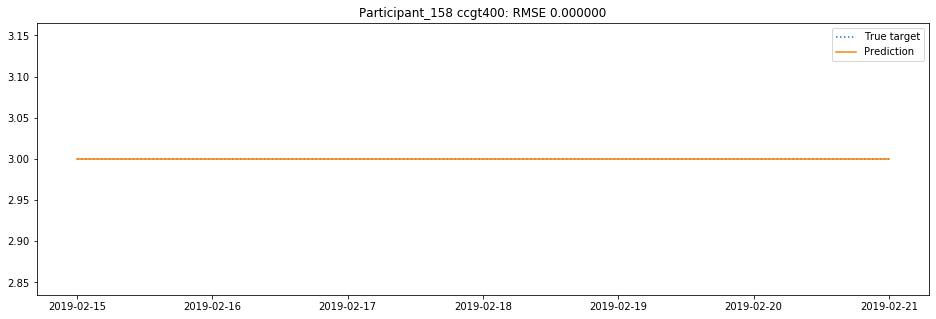

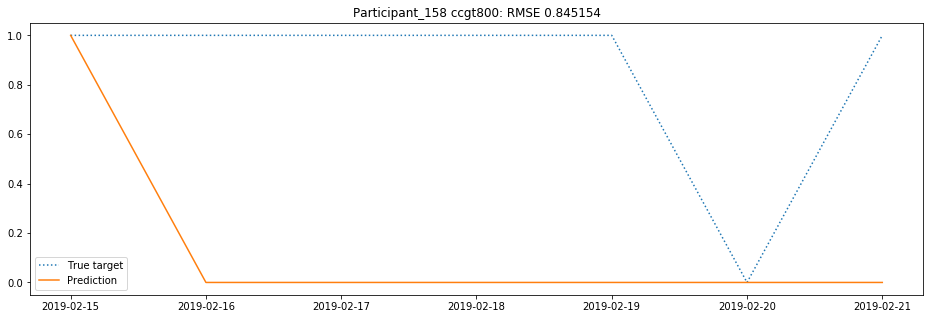

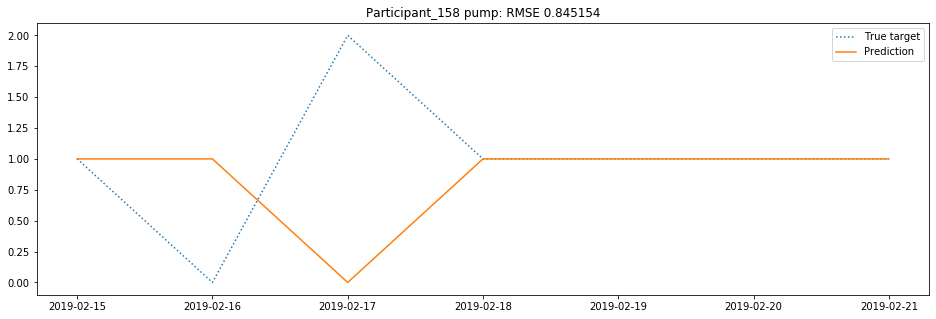

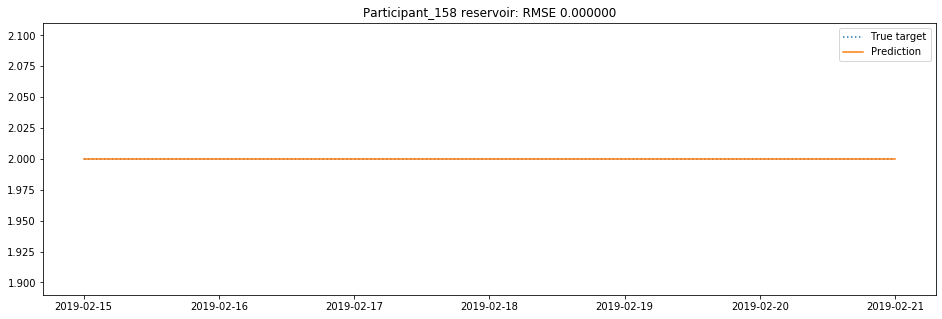

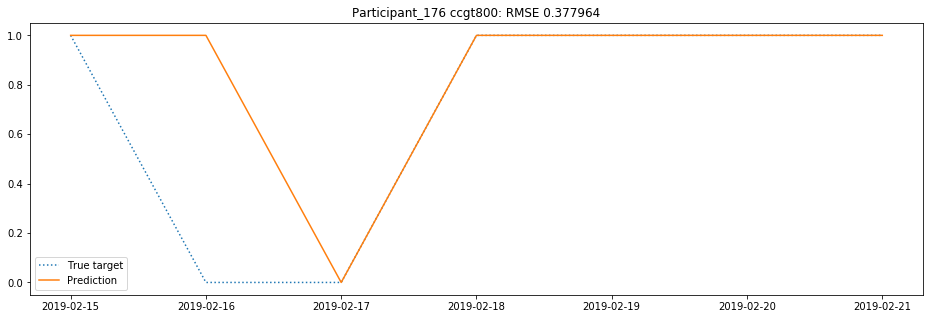

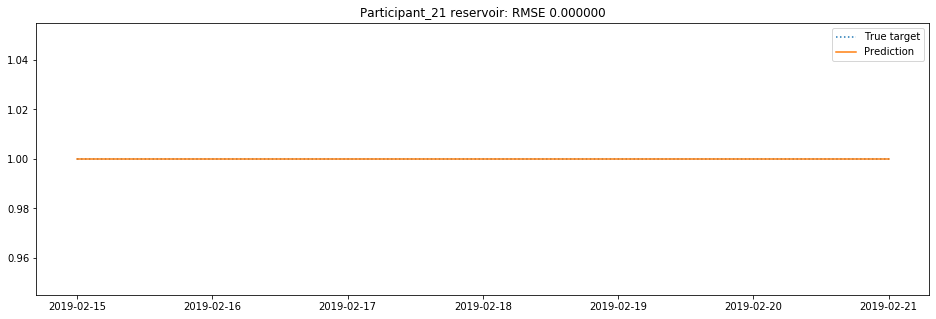

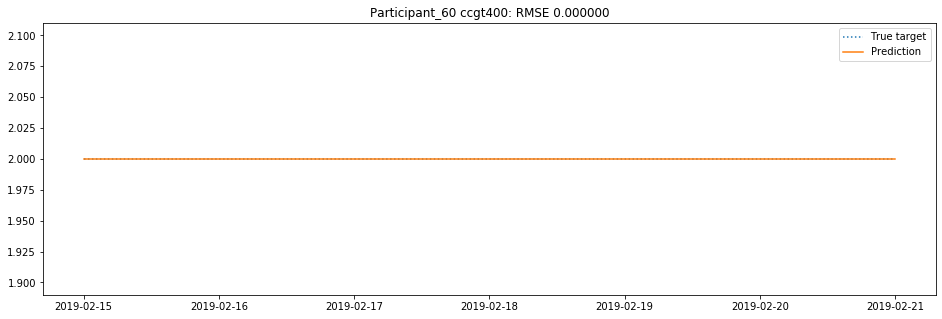

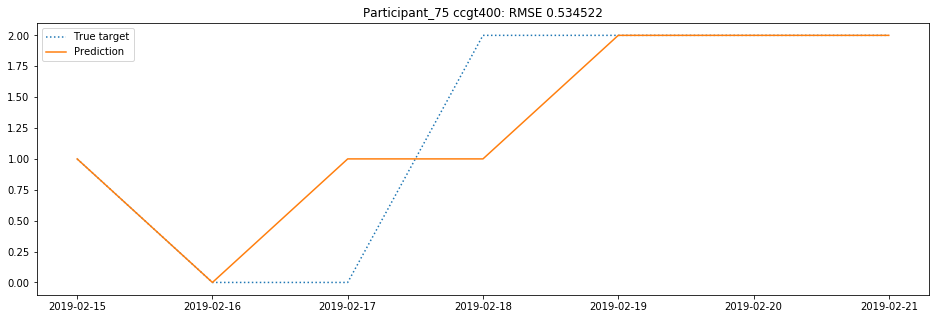

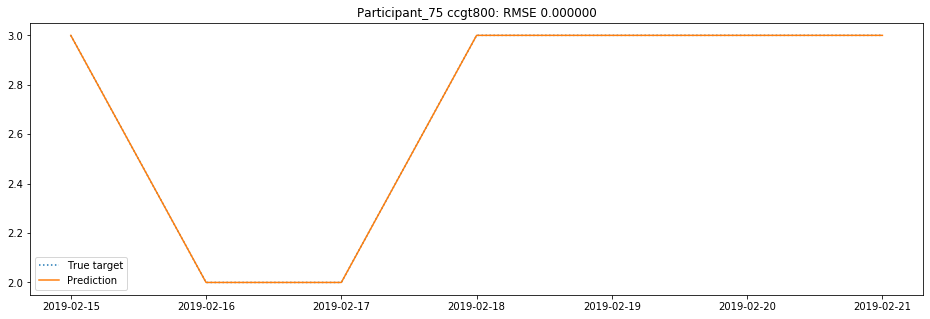

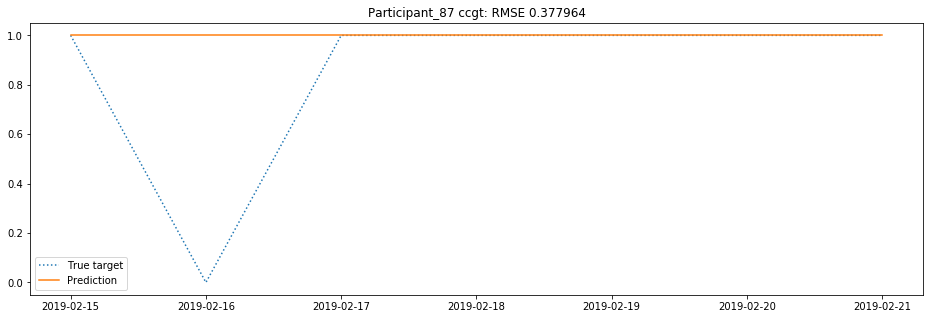

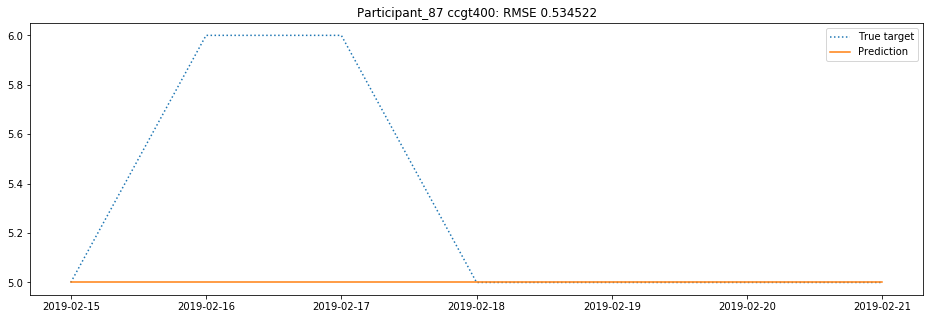

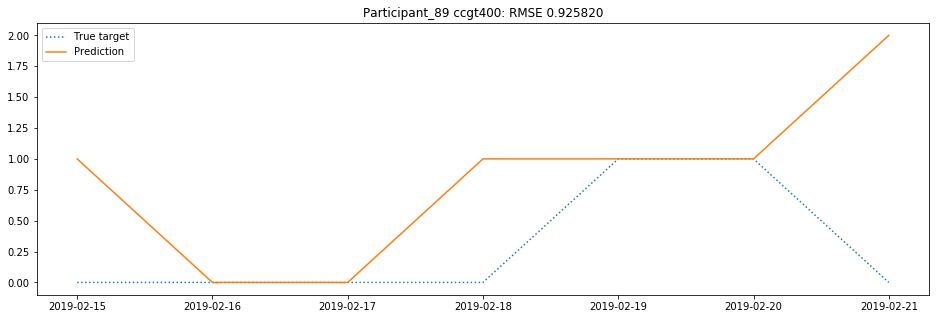

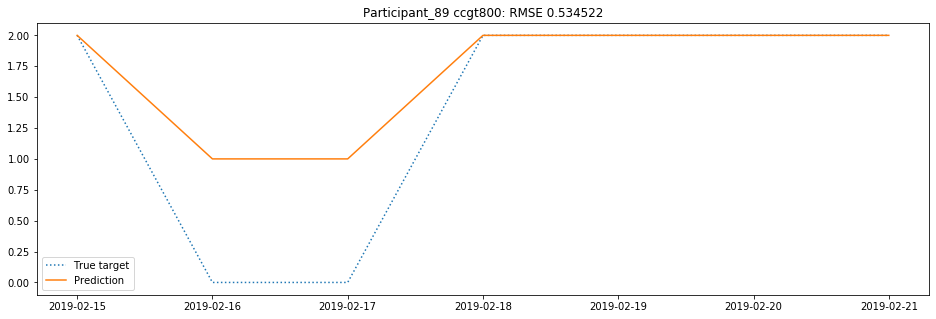

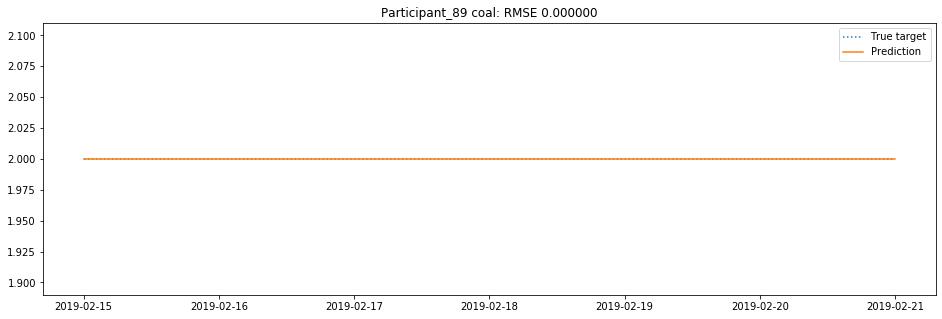

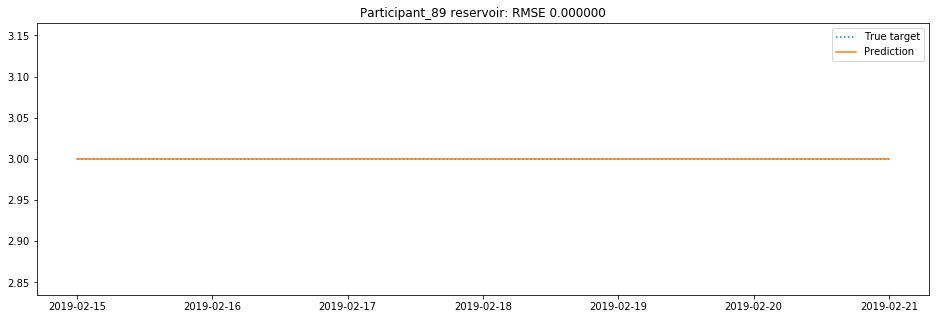

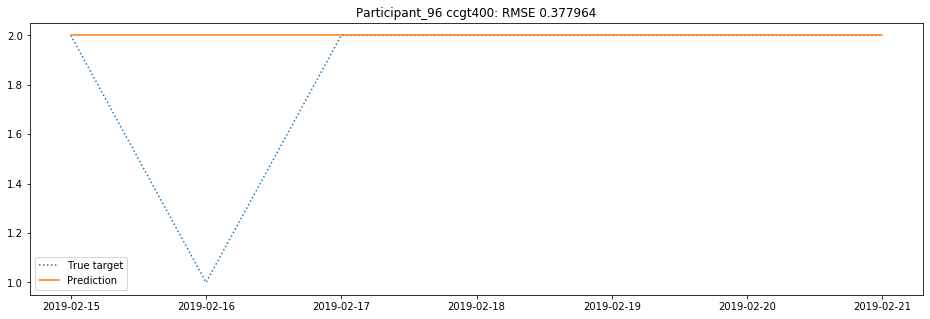

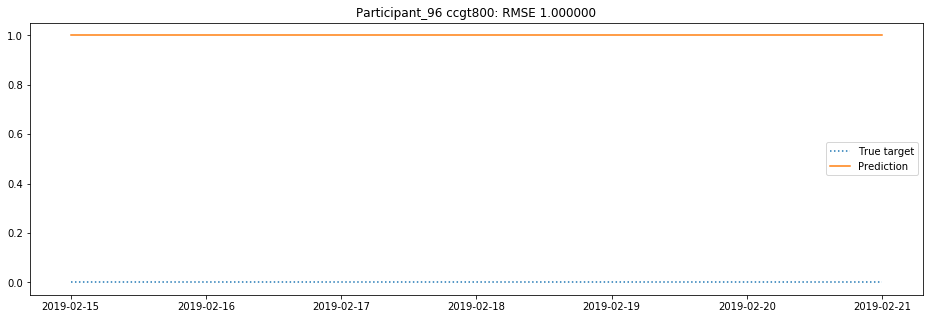

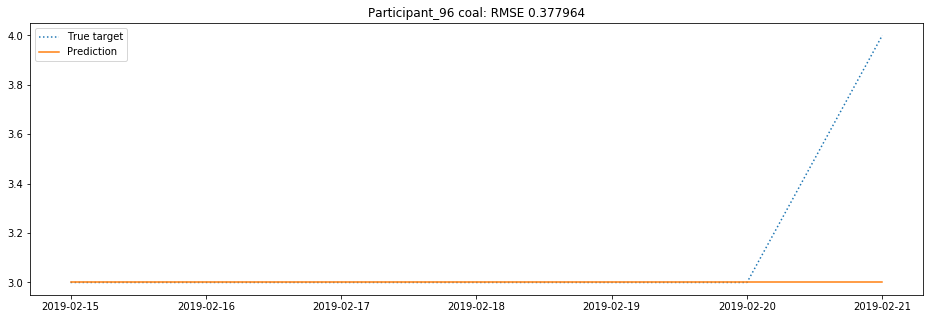

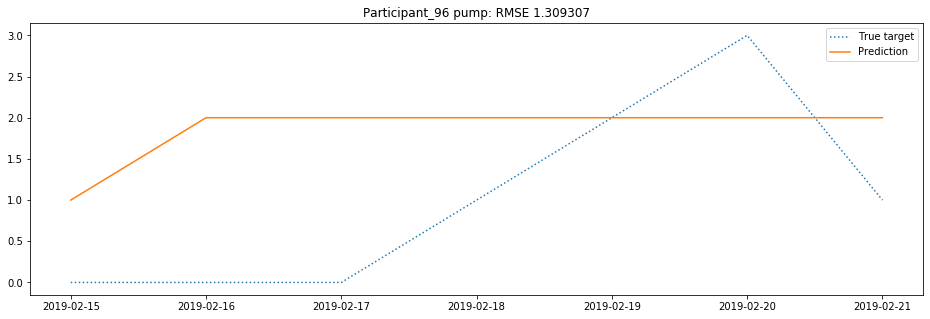

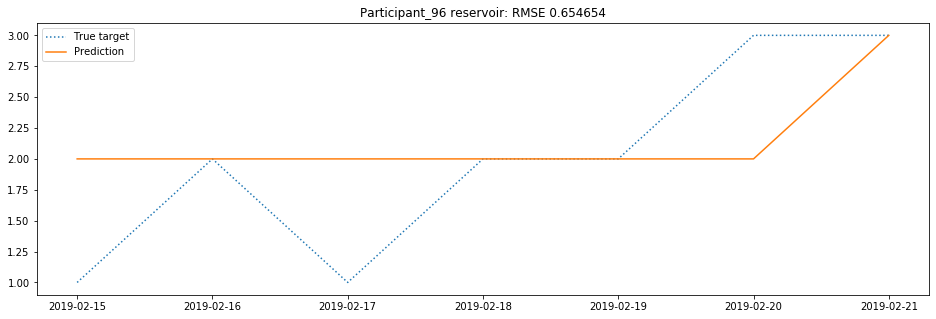

In [53]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams.update({'figure.max_open_warning': 50})

for i, pair in enumerate(unique_pairs):
    
    current_true_Y_df = test_Y_df.n_acc_offers[(test_Y_df['participant'] == pair[0]) \
                                & (test_Y_df['technology'] == pair[1])]
    current_pred_Y_df = test_Y_pred_LGBM_df.n_acc_offers[(test_Y_pred_LGBM_df['participant'] == pair[0]) \
                                & (test_Y_pred_LGBM_df['technology'] == pair[1])]
    
    true_Y = current_true_Y_df.to_numpy()
    pred_Y = current_pred_Y_df.to_numpy()
    
    current_MSE = np.sqrt(calculate_MSE(true_Y, pred_Y))
    
    print(pair[0].capitalize(), pair[1], current_MSE)
    
    plt.figure(i,figsize=(16,5))
    
    plt.title('{} {}: RMSE {:5f}'.format(pair[0].capitalize(), pair[1], current_MSE))
    
    plt.plot(current_true_Y_df.index, true_Y, label='True target', ls=':')
    plt.plot(current_true_Y_df.index, pred_Y, label='Prediction')
    
    plt.legend()